### Import modules

In [3]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import seaborn as sns
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xtrack as xt
import json
import pickle

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy                                         
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318                               4.5   
                                                 102.5          62.313 60.318                               4.5   
                                                 105.0          62.313 60.318                               4.5   
                                                 107.5          62.313 60.318                               4.5   
                                                 110.0          62.313 60.318                               4.5   
...                                                                                                         ...   
      collider_02        1.400000e+11            160.0          62.313 60.318                               4.5   
                                                 162.5          62.313 60.318                               4.5   
                                                 165.0          62.313 60.318                               4.5   
                                                 167.5          62.313 60.318                               4.5   
                                                 170.0          62.313 60.318                               4.5   

                                                                                   qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  62.313   
                                                 102.5          62.313 60.318  62.313   
                                                 105.0          62.313 60.318  62.313   
                                                 107.5          62.313 60.318  62.313   
                                                 110.0          62.313 60.318  62.313   
...                                                                               ...   
      collider_02        1.400000e+11            160.0          62.313 60.318  62.313   
                                                 162.5          62.313 60.318  62.313   
                                                 165.0          62.313 60.318  62.313   
                                                 167.5          62.313 60.318  62.313   
                                                 170.0          62.313 60.318  62.313   

                                                                                   qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  60.318   
                                                 102.5          62.313 60.318  60.318   
                                                 105.0          62.313 60.318  60.318   
                                                 107.5          62.313 60.318  60.318   
                                                 110.0          62.313 60.318  60.318   
...                                                                               ...   
      collider_02        1.400000e+11            160.0          62.313 60.318  60.318   
                                                 162.5          62.313 60.318  60.318   
                                                 165.0          62.313 60.318  60.318   
                                                 167.5          62.313 60.318  60.318   
                                                 170.0          62.313 60.318  60.318   

                                                                                dqx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy             
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  15.0   
      

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
df_to_plot


crossing_angle           100.0  102.5  105.0  107.5  110.0  112.5  115.0  \
num_particles_per_bunch                                                    
0.600                      4.5    4.5    4.5  4.500  4.500  4.750  4.719   
0.625                      4.5    4.5    4.5  4.531  4.500  4.594  4.625   
0.650                      4.5    4.5    4.5  4.500  4.500  4.531  4.562   
0.675                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.700                      4.5    4.5    4.5  4.500  4.531  4.594  4.500   
0.725                      4.5    4.5    4.5  4.500  4.500  4.531  4.500   
0.750                      4.5    4.5    4.5  4.500  4.500  4.500  4.531   
0.775                      4.5    4.5    4.5  4.500  4.500  4.531  4.500   
0.800                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.825                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.850                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.875                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.900                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.925                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.950                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
0.975                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.000                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.025                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.050                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.075                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.100                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.125                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.150                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.175                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.200                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.225                      4.5    4.5    NaN  4.500  4.500  4.500  4.500   
1.250                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.275                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.300                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.325                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.350                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.375                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   
1.400                      4.5    4.5    4.5  4.500  4.500  4.500  4.500   

crossing_angle           117.5  120.0  122.5  ...  147.5  150.0  152.5  155.0  \
num_particles_per_bunch                       ...                               
0.600                    4.625  5.000  5.062  ...  6.188  6.031  6.469  6.562   
0.625                    4.906  4.938  4.969  ...  6.188  6.000  6.344  6.406   
0.650                    4.562  4.875  5.031  ...  6.000  6.219  6.312  6.312   
0.675                    4.625  4.812  4.969  ...  6.125  5.875  6.312  6.250   
0.700                    4.531  4.594  4.875  ...  6.062  6.031  6.062  6.281   
0.725                    4.656  4.656  4.938  ...  5.875  5.906  6.219  5.969   
0.750                    4.500  4.750  4.781  ...  5.750  5.875  5.906  6.125   
0.775                    4.500  4.656  4.719  ...  5.719  5.906  6.031  6.188   
0.800                    4.500  4.656  4.688  ...  5.812  5.812  5.875  6.031   
0.825                    4.531  4.562  4.625  ...  5.656  5.875  5.781  5.969   
0.850                    4.500  4.500  4.594  ...  5.531  5.781  5.812  5.844   
0.875                    4.500  4.500  4.500  ...  5.562  5.500  5.750  5.719   
0.900                    4.500  4.500  4.500  ...  5.531  5.562  5.688  5.625   
0.925                    4.531  4.500  4.500  ...  5.438  5.281  5.562  5.719   
0.950                    4.500  4.500  4.50

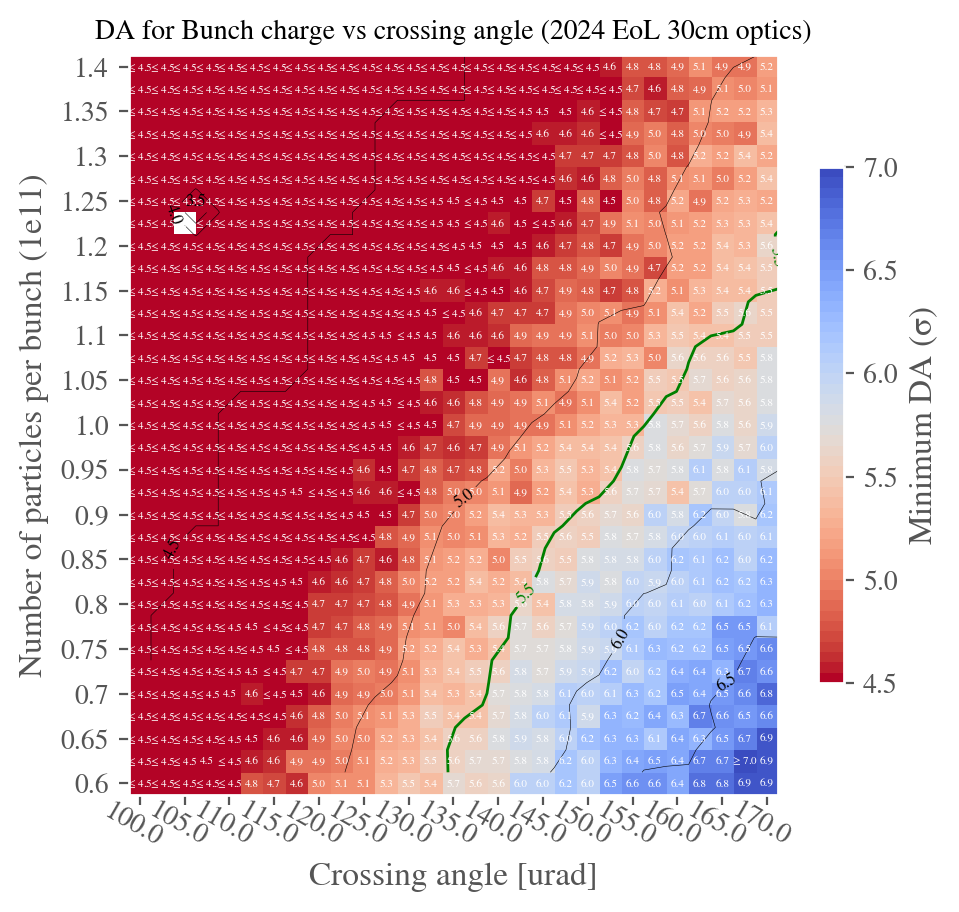

In [4]:
# Load configuration files
qx = 62.313
qy = 60.318
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)


In [5]:
df_30_cm = df_to_plot.copy()

### 26cm

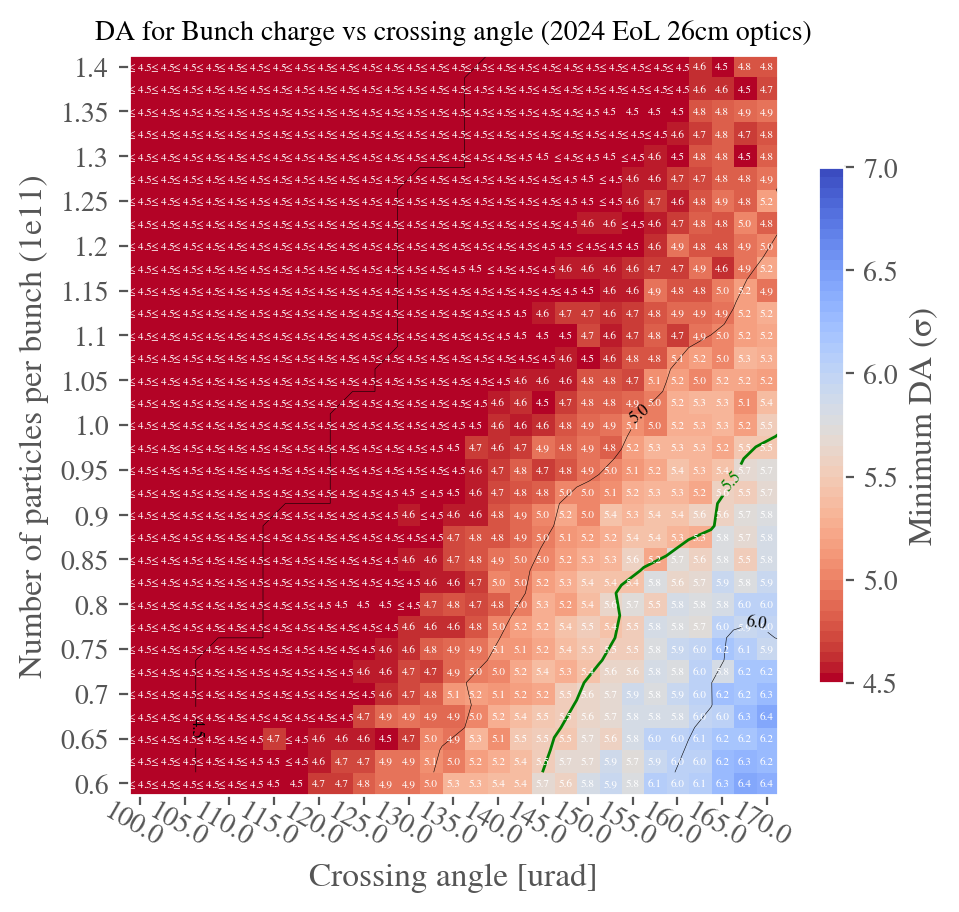

In [6]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [7]:
df_26_cm = df_to_plot.copy()

### 22 cm

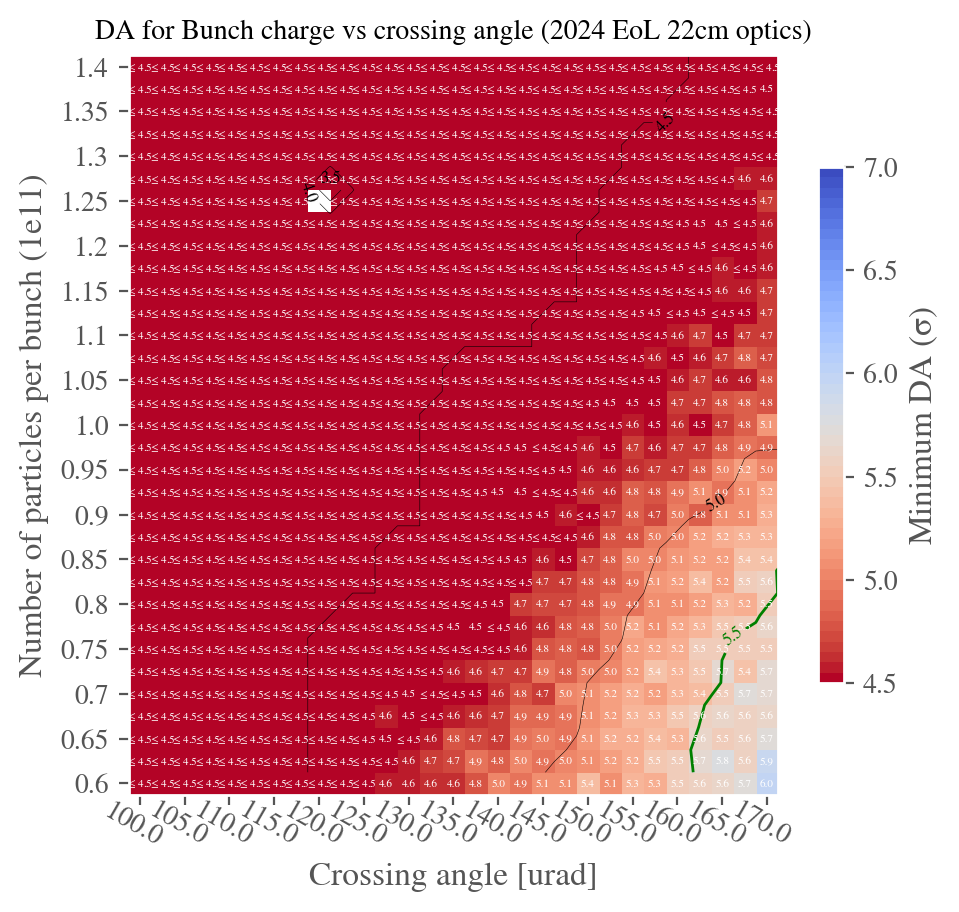

In [8]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

In [9]:
df_22_cm = df_to_plot.copy()

## Interpolate the data for each optics

In [10]:
from scipy import interpolate
import numpy as np

In [11]:
x = df_30_cm.index
y = df_30_cm.columns
array = np.ma.masked_invalid(df_30_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_30cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_30cm.index = df_30_cm.index
interpolate_df_30cm.columns = df_30_cm.columns

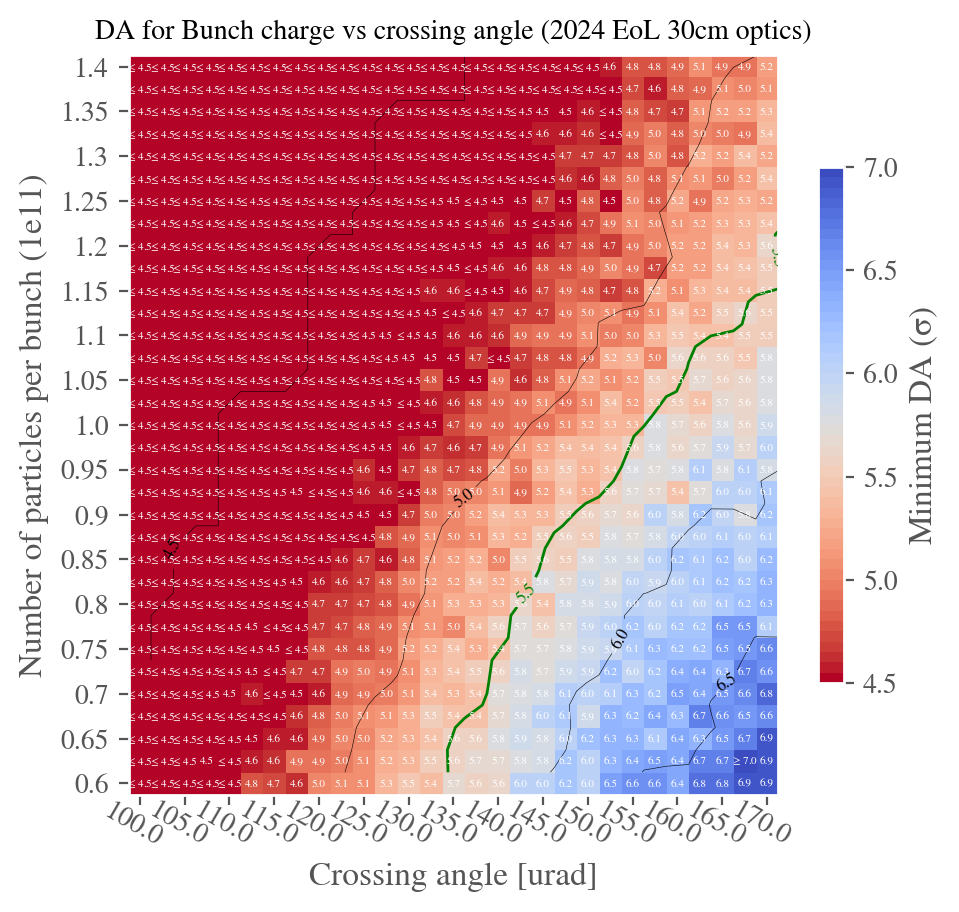

In [12]:
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_30cm,
    '30cm_interpolated'+ '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)

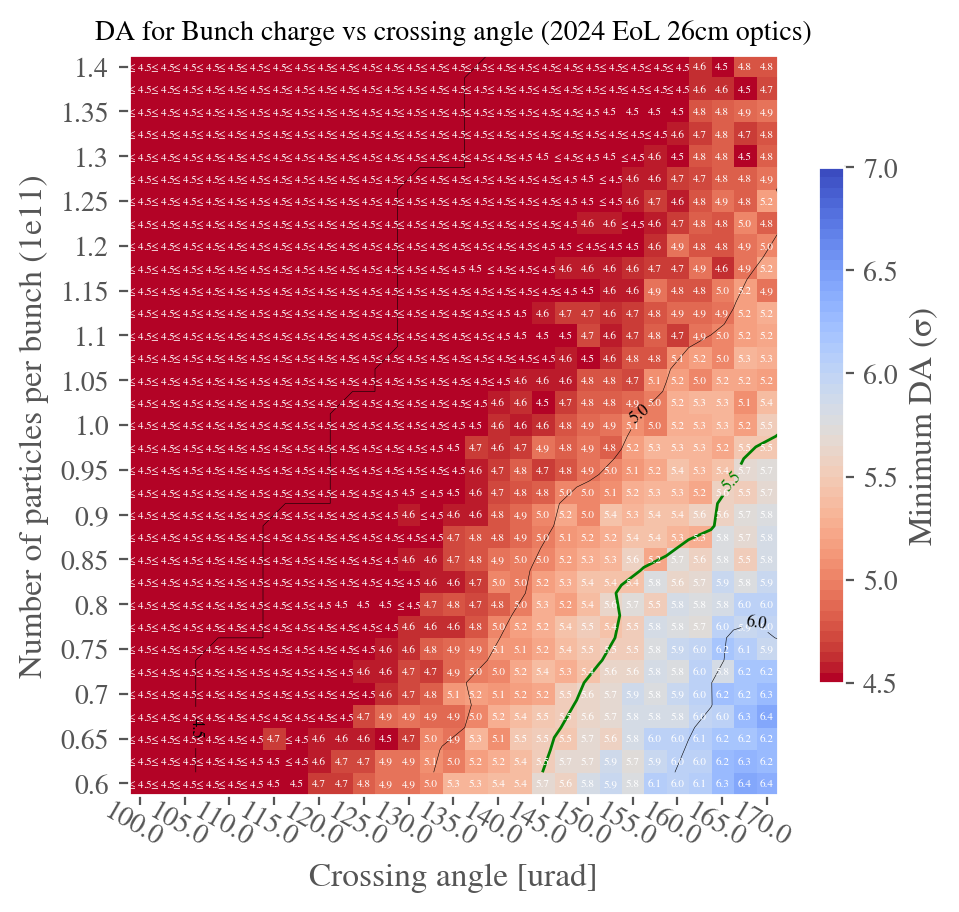

In [13]:
x = df_26_cm.index
y = df_26_cm.columns
array = np.ma.masked_invalid(df_26_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_26cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_26cm.index = df_26_cm.index
interpolate_df_26cm.columns = df_26_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_26cm,
    '26cm_interpolated'+ '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

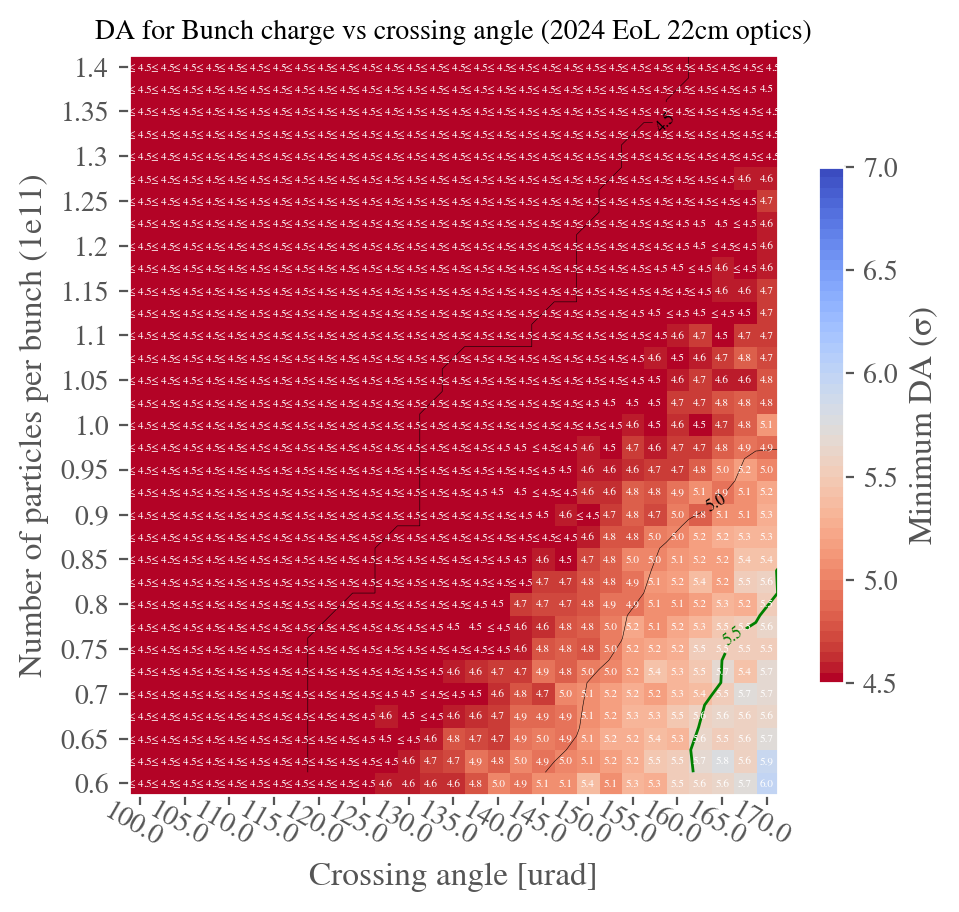

In [14]:
x = df_22_cm.index
y = df_22_cm.columns
array = np.ma.masked_invalid(df_22_cm.values.T)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~array.mask]
y1 = yy[~array.mask]
newarr = array[~array.mask]
interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method='cubic')
interpolate_df_22cm = pd.DataFrame(interpolated_grid.T).interpolate(axis = 1)
interpolate_df_22cm.index = df_22_cm.index
interpolate_df_22cm.columns = df_22_cm.columns

conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    interpolate_df_22cm,
    '22cm_interpolated'+ '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

### Find contours at 5.5 sigma

In [15]:
contours_30cm = find_contours(interpolate_df_30cm.values, level=5.5)

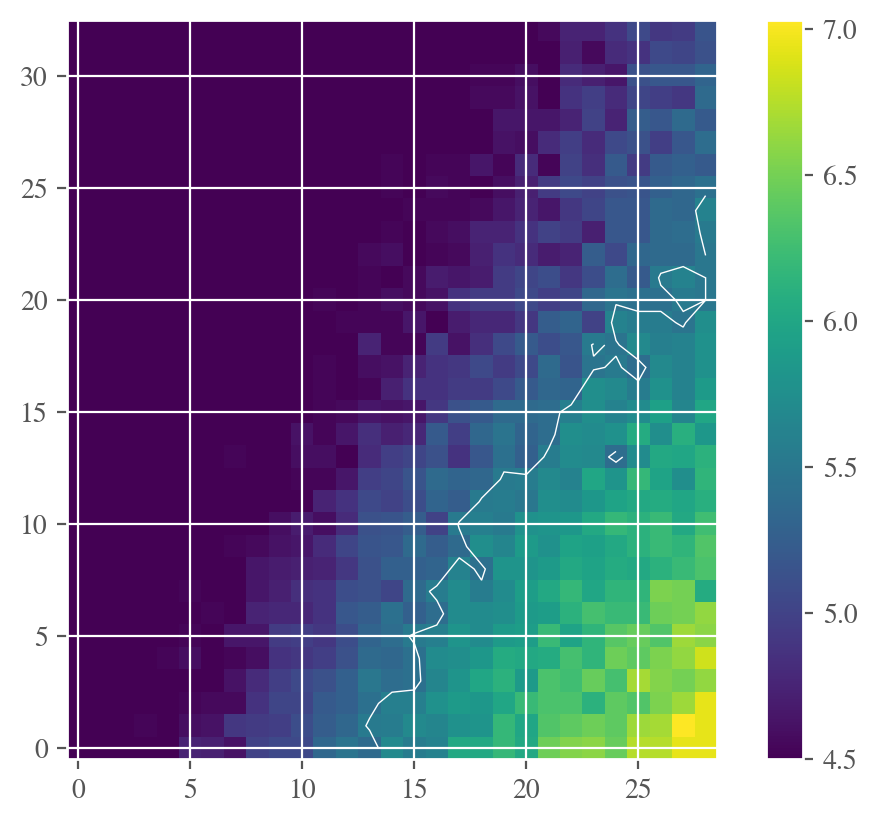

In [16]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
    
plt.show()

In [17]:
# Smooth a lot to have a smooth contour
smooth_30cm = gaussian_filter(interpolate_df_30cm.values, sigma=1)
contours_30cm = find_contours(smooth_30cm, level=5.5)


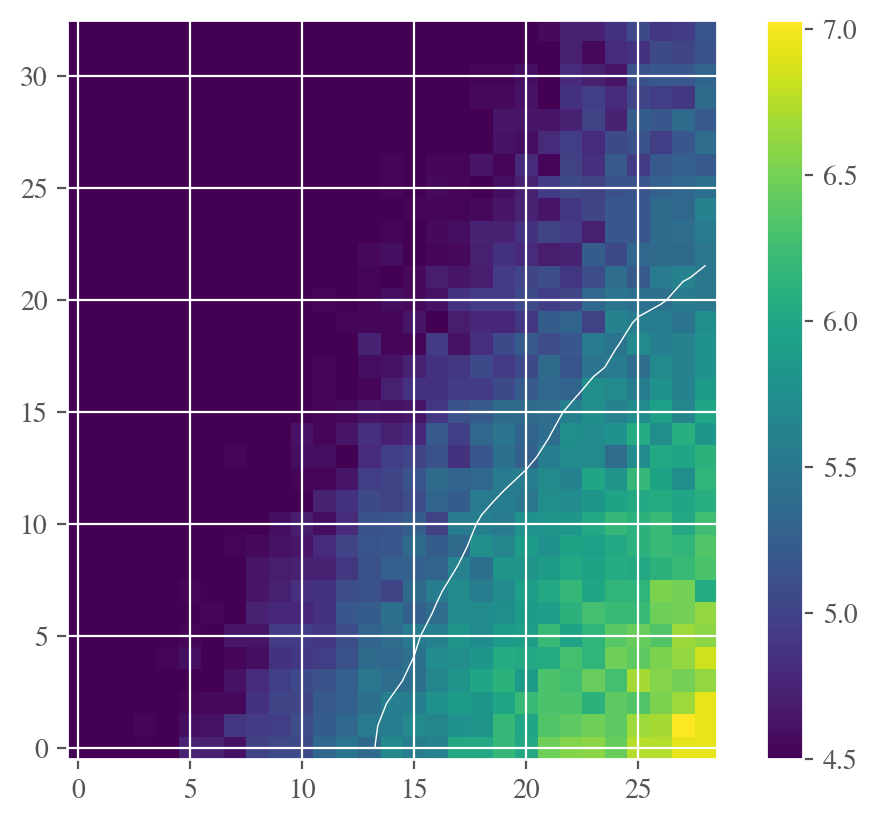

In [18]:
fig, ax = plt.subplots(1, 1)
img = ax.imshow(interpolate_df_30cm.values, origin='lower')
plt.colorbar(img)
for i in range(len(contours_30cm)):
    p = plt.Polygon(contours_30cm[i][:,[1,0]], fill=False, color='w', closed = False)
    ax.add_artist(p)
plt.show()

In [19]:
# Also get the same curve for 26cm and 22cm
smooth_26cm = gaussian_filter(interpolate_df_26cm.values, sigma=1)
contours_26cm = find_contours(smooth_26cm, level=5.5)

smooth_22cm = gaussian_filter(interpolate_df_22cm.values, sigma=1)
contours_22cm = find_contours(smooth_22cm, level=5.5)



In [20]:
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

# %config InlineBackend.figure_format='pdf'

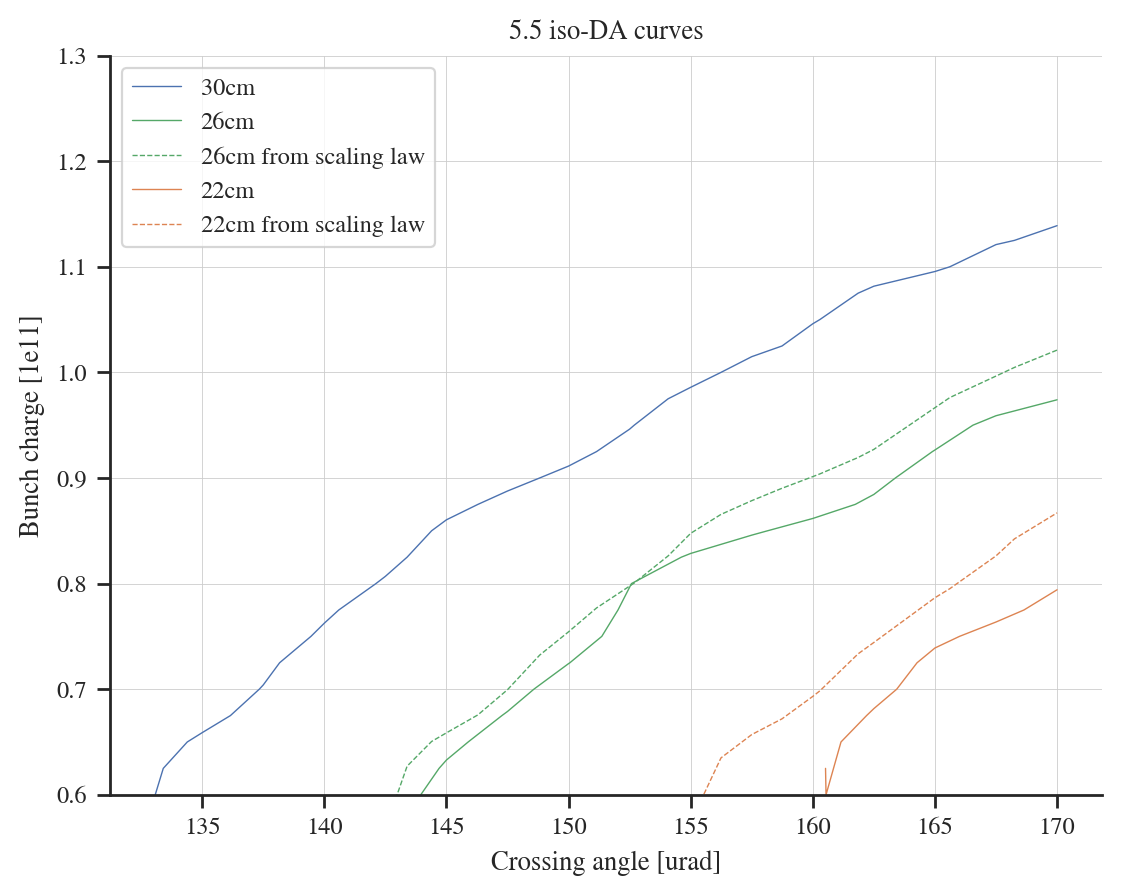

In [21]:
# Extract curve
contour_for_extraction_30cm = contours_30cm[0][contours_30cm[0][:, 1].argsort()]
contour_for_extraction_26cm = contours_26cm[0][contours_26cm[0][:, 1].argsort()]
contour_for_extraction_22cm = contours_22cm[0][contours_22cm[0][:, 1].argsort()]

x_30cm = contour_for_extraction_30cm[:,1]
y_30cm = contour_for_extraction_30cm[:,0]

x_26cm = contour_for_extraction_26cm[:,1]
y_26cm = contour_for_extraction_26cm[:,0]

x_22cm = contour_for_extraction_22cm[:,1]
y_22cm = contour_for_extraction_22cm[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm = f2(x_30cm)
y_real_30cm = f1(y_30cm)

x_real_26cm = f2(x_26cm)
y_real_26cm = f1(y_26cm)

x_real_22cm = f2(x_22cm)
y_real_22cm = f1(y_22cm)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm, y_real_30cm, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm = f3(x_real_30cm * np.sqrt(22/30))
rescaled_y_26cm = f3(x_real_30cm * np.sqrt(26/30))

plt.plot(x_real_30cm,y_real_30cm, color = 'C0', label = '30cm')

plt.plot(x_real_26cm,y_real_26cm, color = 'C2', label = '26cm')
plt.plot(x_real_30cm, rescaled_y_26cm, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm,y_real_22cm, color = 'C1', label = '22cm')
plt.plot(x_real_30cm, rescaled_y_22cm, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5.5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5dot5.pdf')
plt.show()

### Find contours at 5 sigma

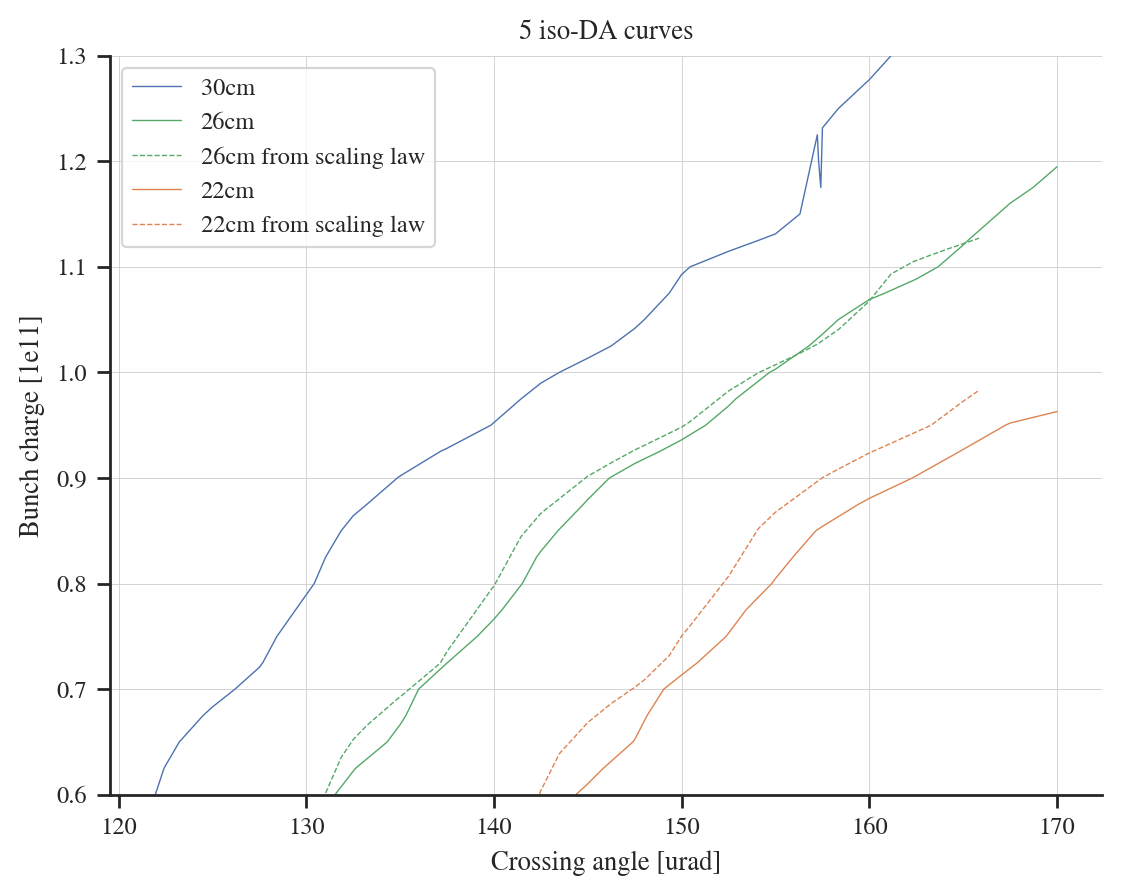

In [22]:
# Smooth to have a smooth contour
contours_30cm_5sig = find_contours(smooth_30cm, level=5)
contours_26cm_5sig = find_contours(smooth_26cm, level=5)
contours_22cm_5sig = find_contours(smooth_22cm, level=5)

# Extract curve
contour_for_extraction_30cm_5sig = contours_30cm_5sig[0][contours_30cm_5sig[0][:, 1].argsort()]
contour_for_extraction_26cm_5sig = contours_26cm_5sig[0][contours_26cm_5sig[0][:, 1].argsort()]
contour_for_extraction_22cm_5sig = contours_22cm_5sig[0][contours_22cm_5sig[0][:, 1].argsort()]

x_30cm_5sig = contour_for_extraction_30cm_5sig[:,1]
y_30cm_5sig = contour_for_extraction_30cm_5sig[:,0]

x_26cm_5sig = contour_for_extraction_26cm_5sig[:,1]
y_26cm_5sig = contour_for_extraction_26cm_5sig[:,0]

x_22cm_5sig = contour_for_extraction_22cm_5sig[:,1]
y_22cm_5sig = contour_for_extraction_22cm_5sig[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

x_real_30cm_5sig = f2(x_30cm_5sig)
y_real_30cm_5sig = f1(y_30cm_5sig)

x_real_26cm_5sig = f2(x_26cm_5sig)
y_real_26cm_5sig= f1(y_26cm_5sig)

x_real_22cm_5sig = f2(x_22cm_5sig)
y_real_22cm_5sig = f1(y_22cm_5sig)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm_5sig, y_real_30cm_5sig, bounds_error = False, fill_value = 'extrapolate')
rescaled_y_22cm_5sig = f3(x_real_30cm_5sig * np.sqrt(22/30))
rescaled_y_26cm_5sig = f3(x_real_30cm_5sig * np.sqrt(26/30))

plt.plot(x_real_30cm_5sig,y_real_30cm_5sig, color = 'C0', label = '30cm')

plt.plot(x_real_26cm_5sig,y_real_26cm_5sig, color = 'C2', label = '26cm')
plt.plot(x_real_30cm_5sig, rescaled_y_26cm_5sig, '--', color = 'C2', label = '26cm from scaling law')

plt.plot(x_real_22cm_5sig,y_real_22cm_5sig, color = 'C1', label = '22cm')
plt.plot(x_real_30cm_5sig, rescaled_y_22cm_5sig, '--', color = 'C1', label = '22cm from scaling law')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title("5 iso-DA curves")
plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5.pdf')
plt.show()

### Convert to PU function

In [23]:
# Extracted from master jobs
def compute_collision_from_scheme(config_bb):
    # Get the filling scheme path (in json or csv format)
    filling_scheme_path = config_bb["mask_with_filling_pattern"]["pattern_fname"]

    # Load the filling scheme
    if filling_scheme_path.endswith(".json"):
        with open(filling_scheme_path, "r") as fid:
            filling_scheme = json.load(fid)
    else:
        raise ValueError(
            f"Unknown filling scheme file format: {filling_scheme_path}. It you provided a csv"
            " file, it should have been automatically convert when running the script"
            " 001_make_folders.py. Something went wrong."
        )

    # Extract booleans beam arrays
    array_b1 = np.array(filling_scheme["beam1"])
    array_b2 = np.array(filling_scheme["beam2"])

    # Assert that the arrays have the required length, and do the convolution
    assert len(array_b1) == len(array_b2) == 3564
    n_collisions_ip1_and_5 = array_b1 @ array_b2
    n_collisions_ip2 = np.roll(array_b1, 891) @ array_b2
    n_collisions_ip8 = np.roll(array_b1, 2670) @ array_b2

    return n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8


def compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, num_colliding_bunches):
    luminosity = xt.lumi.luminosity_from_twiss(
        n_colliding_bunches=num_colliding_bunches,
        num_particles_per_bunch=bunch_charge,
        ip_name="ip1",
        nemitt_x=nemitt_x,
        nemitt_y=nemitt_y,
        sigma_z=sigma_z,
        twiss_b1=twiss_b1,
        twiss_b2=twiss_b2,
        crab=crab,
    )
    return luminosity

def compute_PU(luminosity, num_colliding_bunches, T_rev0, cross_section=81e-27):
    return luminosity / num_colliding_bunches * cross_section * T_rev0

def compute_PU_from_lumi(collider, config_bb):
    twiss_b1 = collider.lhcb1.twiss()
    twiss_b2 = collider.lhcb2.twiss()
    crab = False
    nemitt_x = config_bb["nemitt_x"]
    nemitt_y = config_bb["nemitt_y"]
    sigma_z = config_bb["sigma_z"]
    n_collisions_ip1_and_5, n_collisions_ip2, n_collisions_ip8 = compute_collision_from_scheme(config_bb)
    bunch_charge = config_bb["num_particles_per_bunch"]
    T_rev0 = twiss_b1["T_rev0"]
    luminosity = compute_lumi(bunch_charge, twiss_b1, twiss_b2, crab, nemitt_x, nemitt_y, sigma_z, n_collisions_ip1_and_5)
    return compute_PU(luminosity, n_collisions_ip1_and_5, T_rev0)

# Extracted from master job
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=float(config_bb["num_particles_per_bunch"]),
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = config_bb["mask_with_filling_pattern"]["i_bunch_b1"]
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = config_bb["mask_with_filling_pattern"]["i_bunch_b2"]

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )
    return collider

In [24]:
if False:
    # Load collider and config for 30cm optics
    collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/collider.json"
    config_collider_30cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_30cm/base_collider/xtrack_0000/config.yaml"
    collider_30cm = xt.Multiline.from_json(collider_30cm_path)
    config_30cm = analysis_functions.load_config(config_collider_30cm_path)["config_collider"]["config_beambeam"]
    collider_30cm.build_trackers()

    # Same with 26cm and 22cm optics
    collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/collider.json"
    config_collider_26cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_26cm/base_collider/xtrack_0000/config.yaml"
    collider_26cm = xt.Multiline.from_json(collider_26cm_path)
    config_26cm = analysis_functions.load_config(config_collider_26cm_path)["config_collider"]["config_beambeam"]
    collider_26cm.build_trackers()

    collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/collider.json"
    config_collider_22cm_path = "/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/scans/collider_22cm/base_collider/xtrack_0000/config.yaml"
    collider_22cm = xt.Multiline.from_json(collider_22cm_path)
    config_22cm = analysis_functions.load_config(config_collider_22cm_path)["config_collider"]["config_beambeam"]
    collider_22cm.build_trackers()

In [25]:
# Configure the beam-beam only once for each collider (approximation)
if False:
    collider_30cm = configure_beam_beam(collider_30cm, config_30cm)
    collider_26cm = configure_beam_beam(collider_26cm, config_26cm)
    collider_22cm = configure_beam_beam(collider_22cm, config_22cm)

In [26]:
if False:
    # Set bunch charge and crossing angle for all points along the curve, recompute the beam-beam and compute the corresponding PU

    # Start with 5.5 sigmas
    ll_PU = []
    for collider, array_xing, array_nb, config_bb in zip(
        [collider_30cm, collider_26cm, collider_22cm],
        [x_real_30cm, x_real_26cm, x_real_22cm],
        [y_real_30cm, y_real_26cm, y_real_22cm],
        [config_30cm, config_26cm, config_22cm],
    ):
        l_PU = []
        for xing, nb in zip(array_xing, array_nb):
            collider.vars["on_x1"] = float(xing)
            collider.vars["on_x5"] = float(xing)
            config_bb["num_particles_per_bunch"] = float(nb*1e11)
            # collider = configure_beam_beam(collider, config_bb)
            PU = compute_PU_from_lumi(collider, config_bb)
            l_PU.append(PU)
        ll_PU.append(l_PU)

    # Save ll_PU to pickle
    with open("PU_5dot5.pkl", "wb") as f:
        pickle.dump(ll_PU, f)

    # Same with 5 sigmas
    ll_PU_5sig = []
    for collider, array_xing, array_nb, config_bb in zip(
        [collider_30cm, collider_26cm, collider_22cm],
        [x_real_30cm_5sig, x_real_26cm_5sig, x_real_22cm_5sig],
        [y_real_30cm_5sig, y_real_26cm_5sig, y_real_22cm_5sig],
        [config_30cm, config_26cm, config_22cm],
    ):
        l_PU = []
        for xing, nb in zip(array_xing, array_nb):
            collider.vars["on_x1"] = float(xing)
            collider.vars["on_x5"] = float(xing)
            config_bb["num_particles_per_bunch"] = float(nb*1e11)
            # collider = configure_beam_beam(collider, config_bb)
            PU = compute_PU_from_lumi(collider, config_bb)
            l_PU.append(PU)
        ll_PU_5sig.append(l_PU)

    # Save ll_PU to pickle
    with open("PU_5.pkl", "wb") as f:
        pickle.dump(ll_PU_5sig, f)

In [27]:
with open("PU_5dot5.pkl", "rb") as f:
    ll_PU = pickle.load(f)
    
with open("PU_5.pkl", "rb") as f:
    ll_PU_5sig = pickle.load(f)

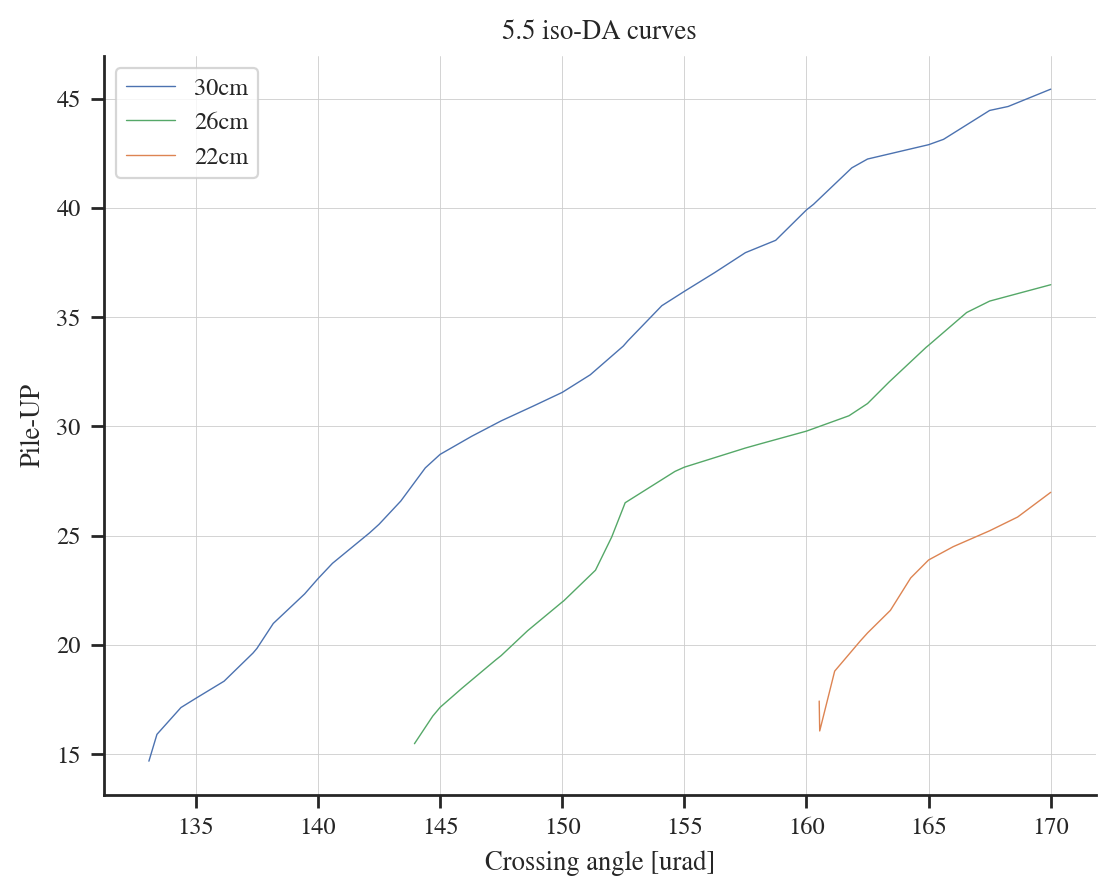

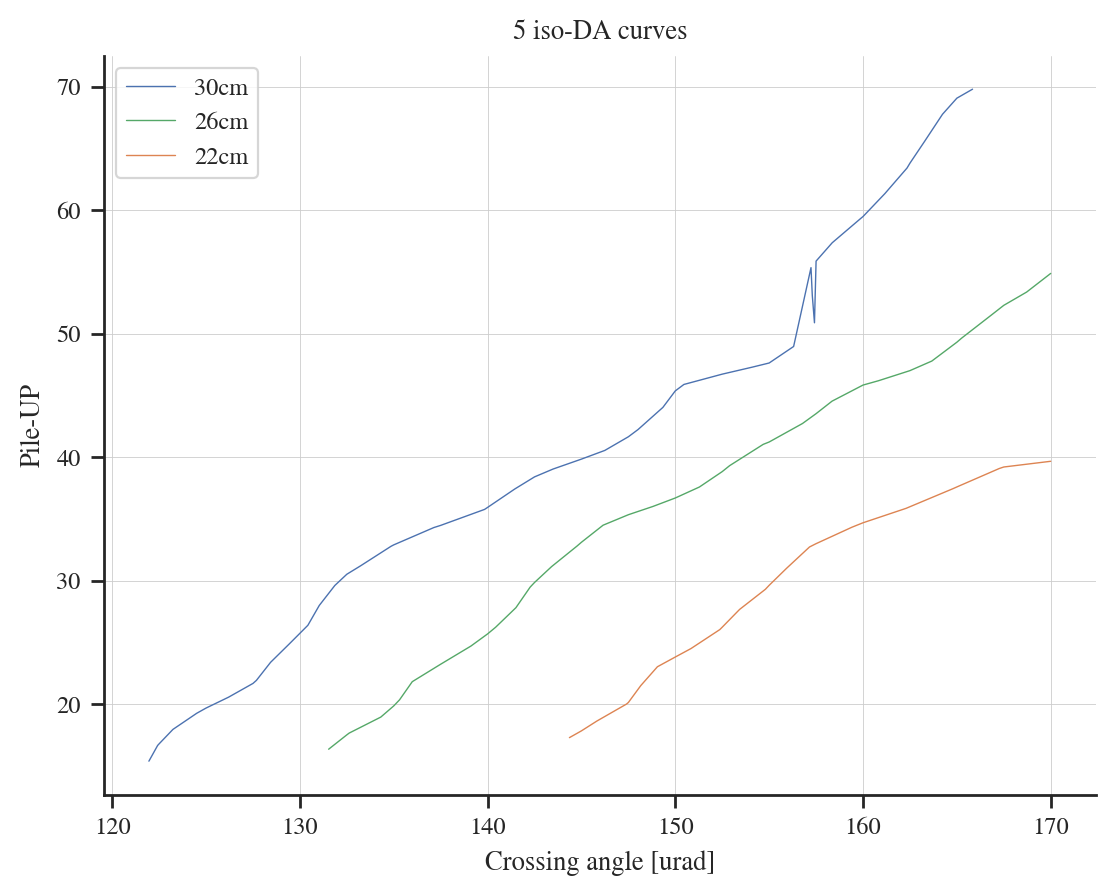

In [28]:
plt.plot(x_real_30cm,ll_PU[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm,ll_PU[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm,ll_PU[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5.5 iso-DA curves")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5dot5_PU.pdf')
plt.show()


plt.plot(x_real_30cm_5sig,ll_PU_5sig[0], color = 'C0', label = '30cm')
plt.plot(x_real_26cm_5sig,ll_PU_5sig[1], color = 'C2', label = '26cm')
plt.plot(x_real_22cm_5sig,ll_PU_5sig[2], color = 'C1', label = '22cm')
plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title("5 iso-DA curves")
#plt.ylim(0.6, 1.3)
plt.legend()
plt.grid()
# plt.savefig('plots/iso_DA_5_PU.pdf')
plt.show()

In [29]:
# Function to convert bunch charge to PU for each optics
f_nb_to_PU_30cm = interpolate.interp1d(y_real_30cm, ll_PU[0], fill_value = 'extrapolate')
f_nb_to_PU_26cm = interpolate.interp1d(y_real_26cm, ll_PU[1], fill_value = 'extrapolate')
f_nb_to_PU_22cm = interpolate.interp1d(y_real_22cm, ll_PU[2], fill_value = 'extrapolate')

### Analysis of other WPs

In [30]:
analysis_functions.apply_heatmap_style()

# Define study
STUDY_NAME = "PU_function_all_optics_lower_WPs"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)



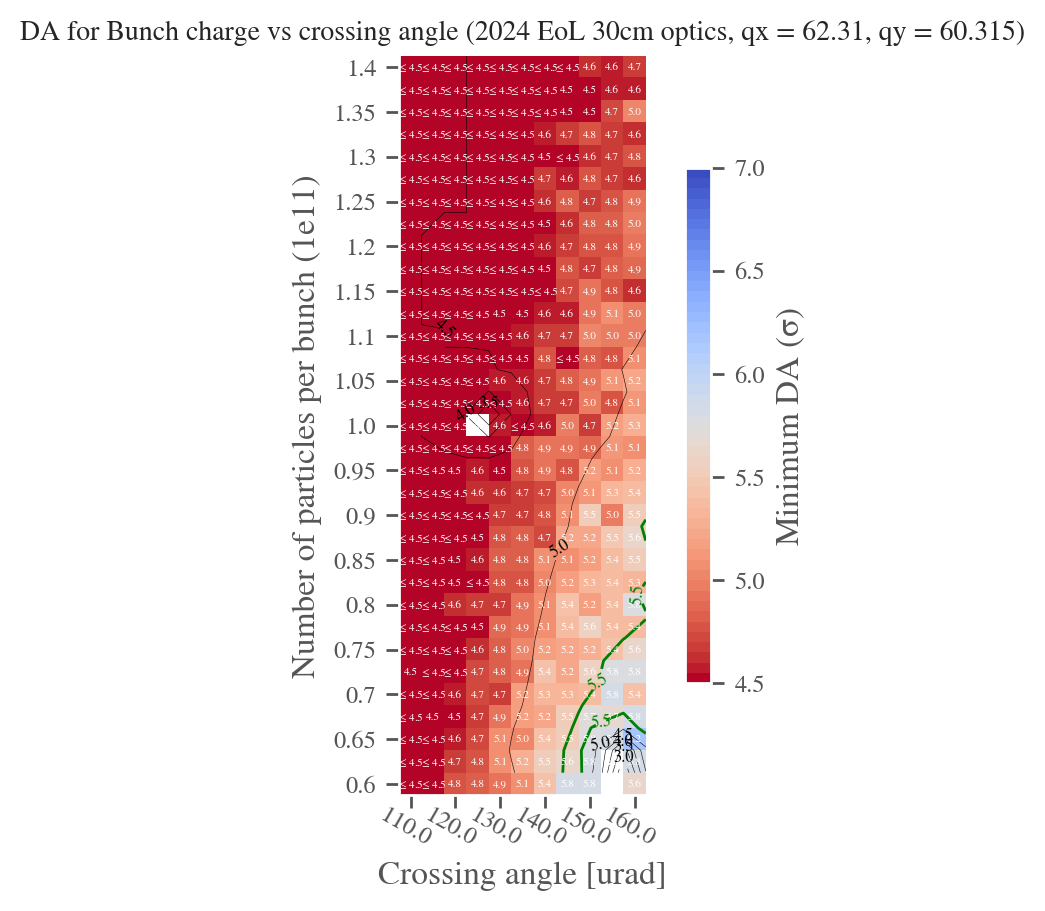

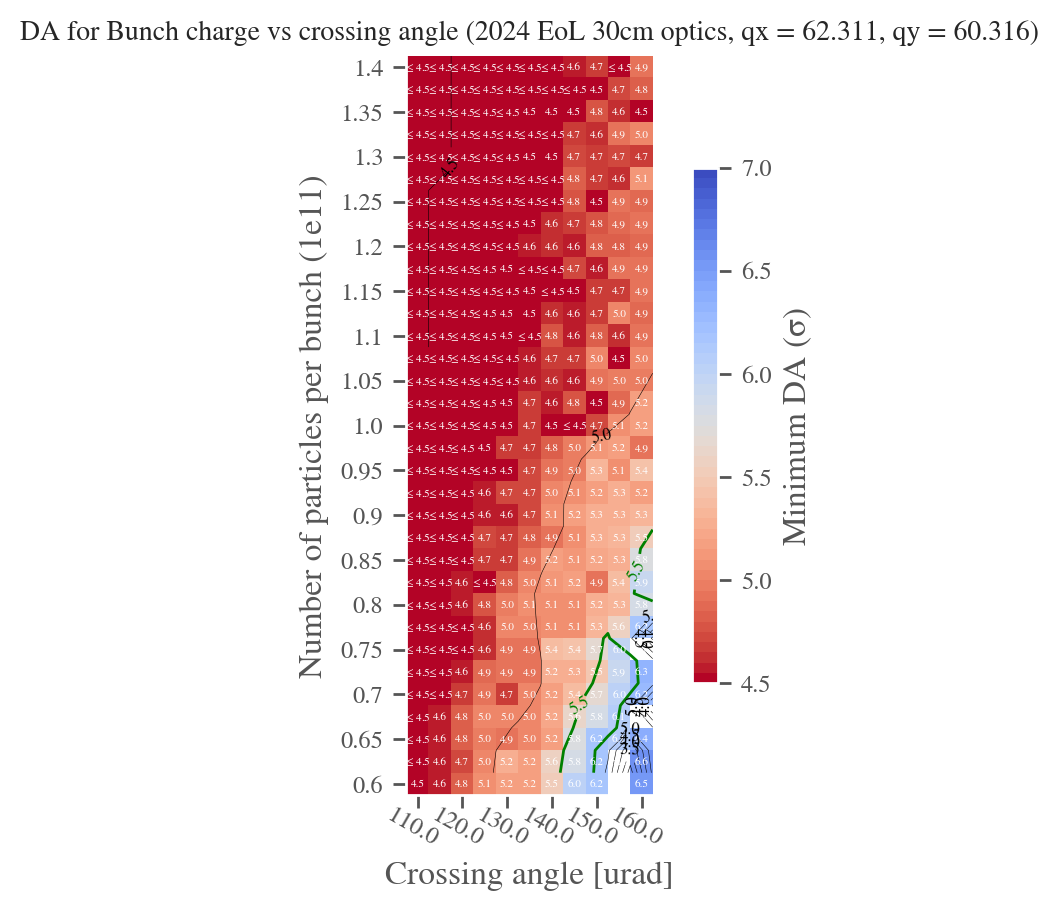

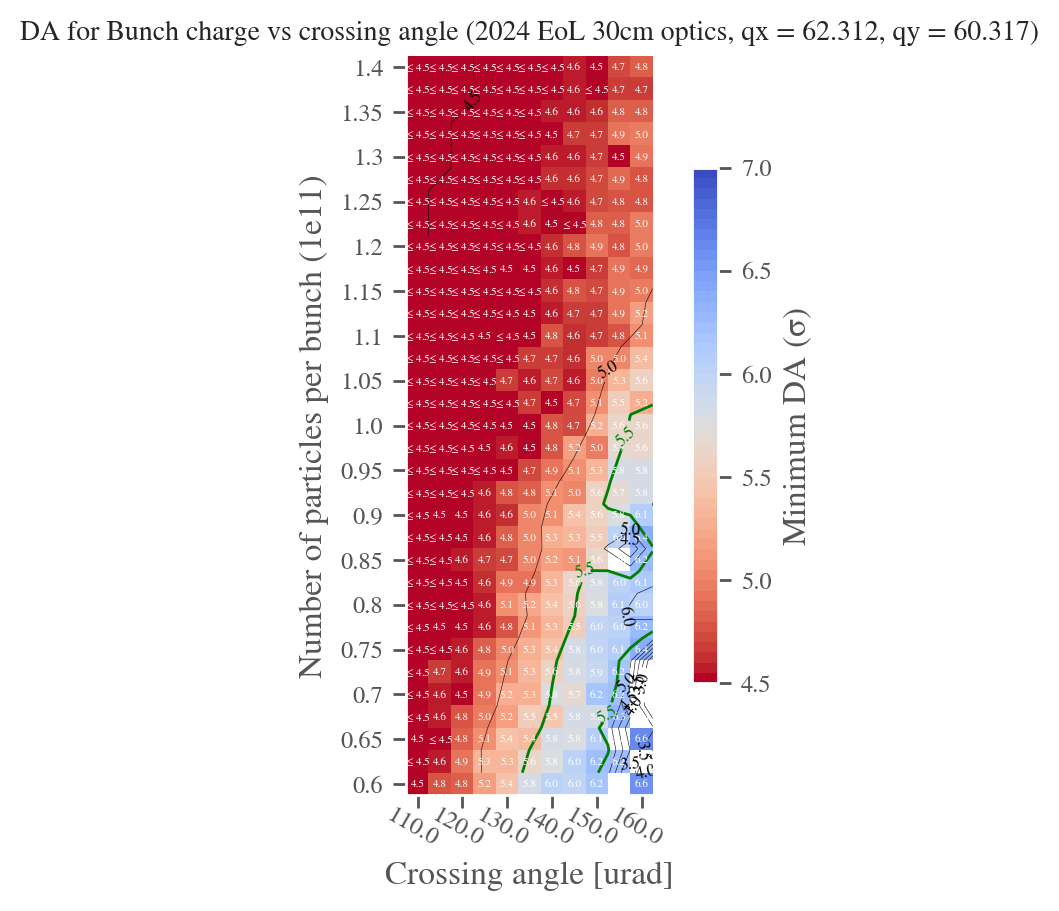

In [31]:
# Add collider to columns
df_copy = df.reset_index(level=1).copy()
l_df_30_cm = []
for (qx,qy) in [(62.310,60.315), (62.311,60.316), (62.312, 60.317)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_30_cm.append(df_to_plot.copy())

    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 30cm optics, qx = {qx}, qy = {qy})"
    )

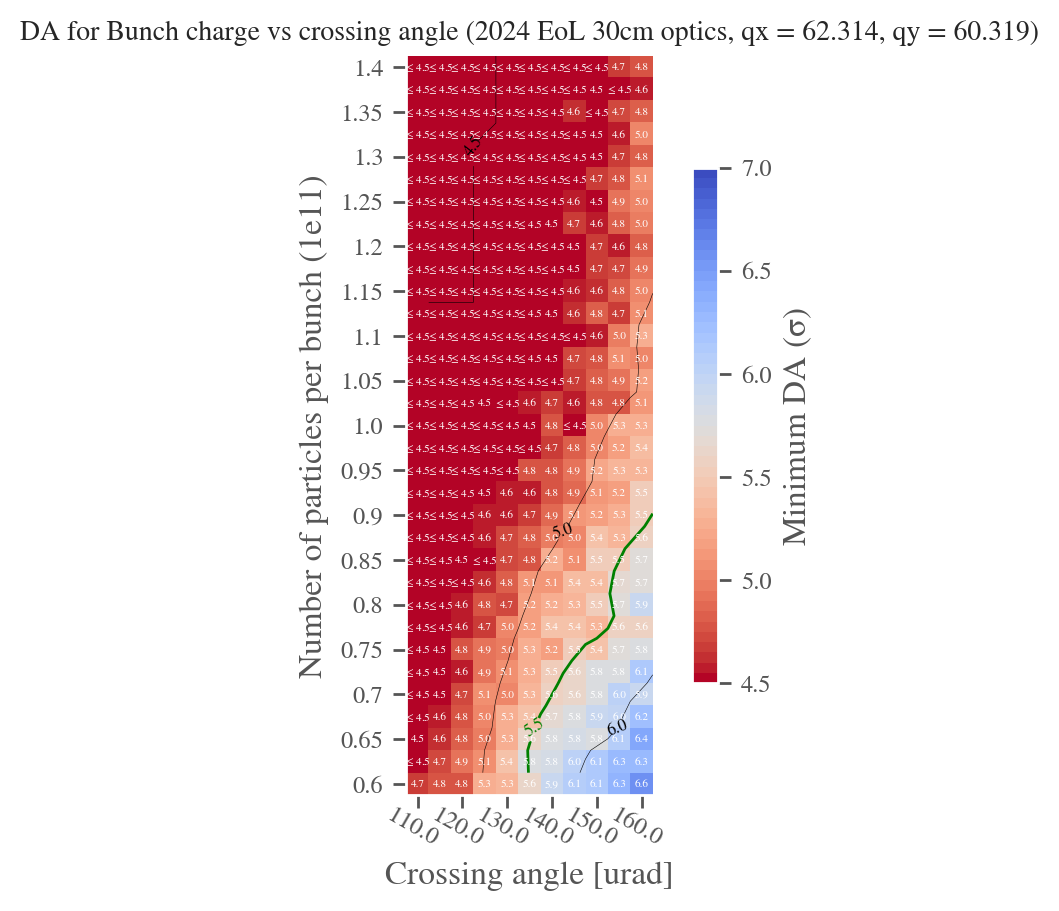

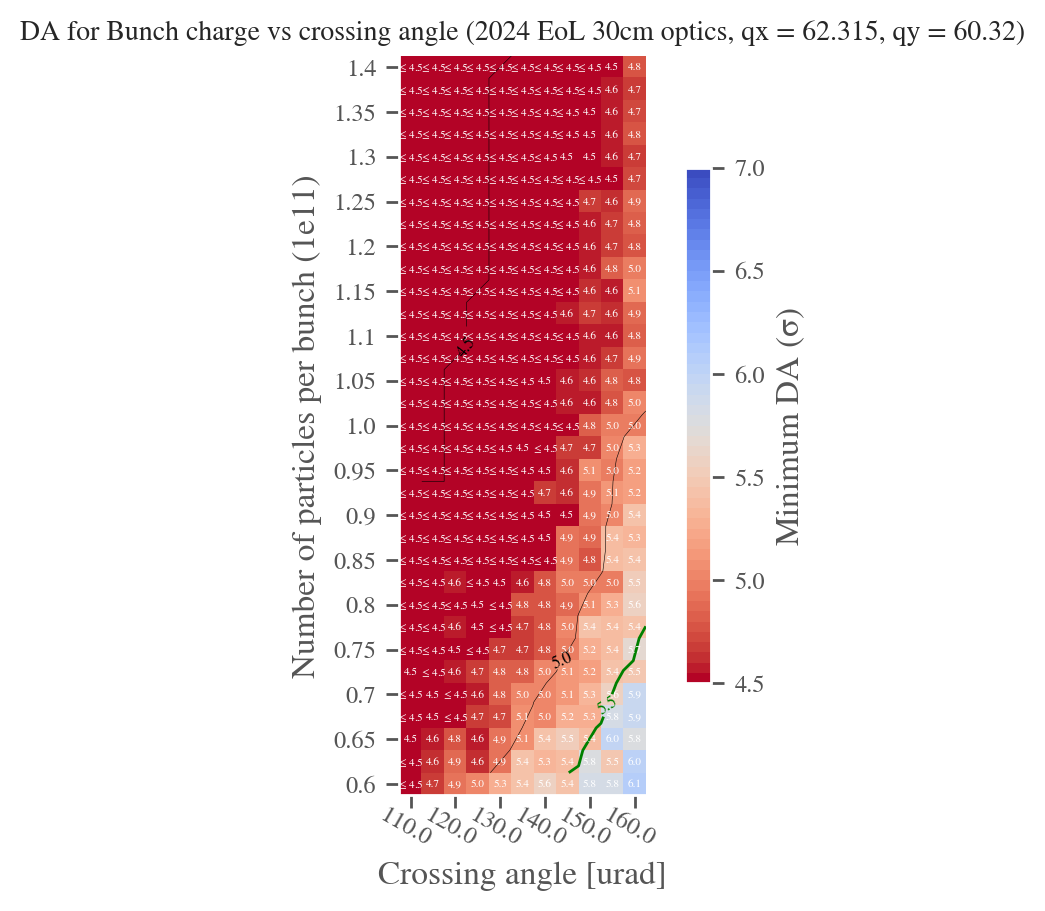

In [32]:
# Define study
STUDY_NAME = "PU_function_all_optics_higher_WPs"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add collider to columns
df_copy = df.reset_index(level=1).copy()
# l_df_30_cm = []
for (qx,qy) in [(62.314,60.319), (62.315,60.320)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_30_cm.append(df_to_plot.copy())

    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 30cm optics, qx = {qx}, qy = {qy})"
    )

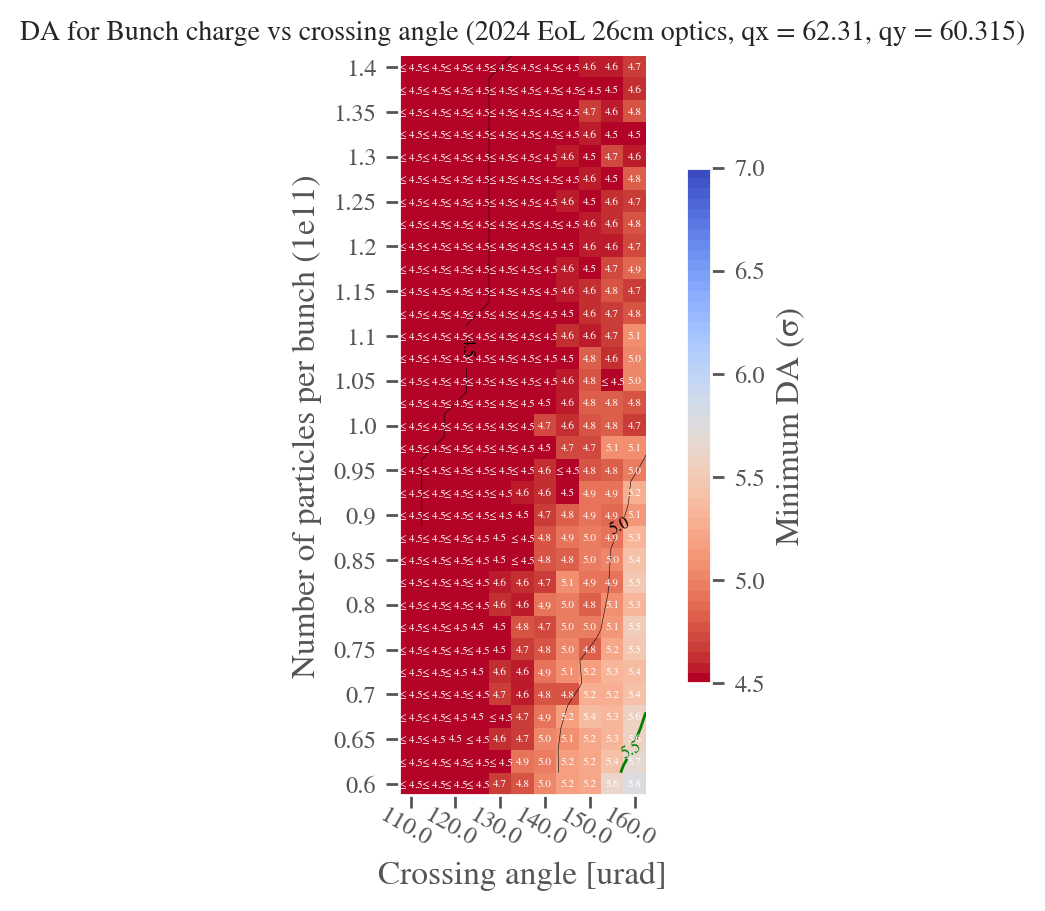

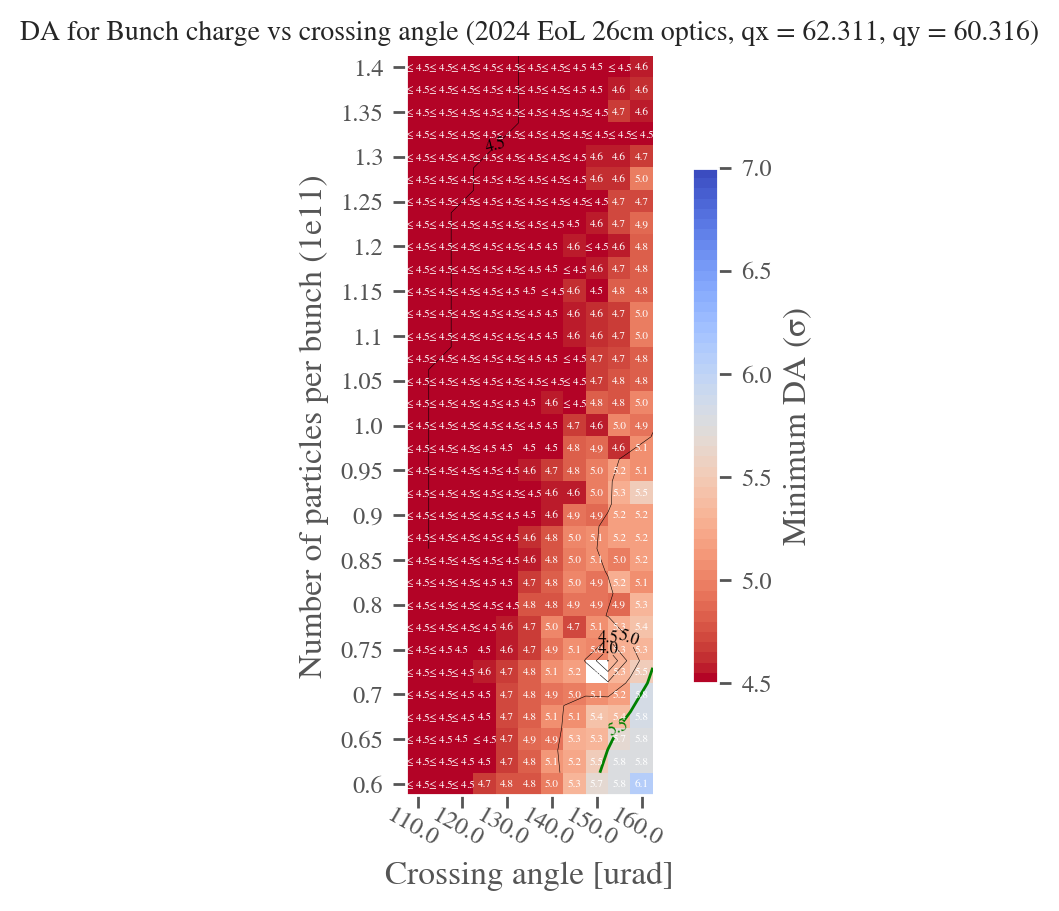

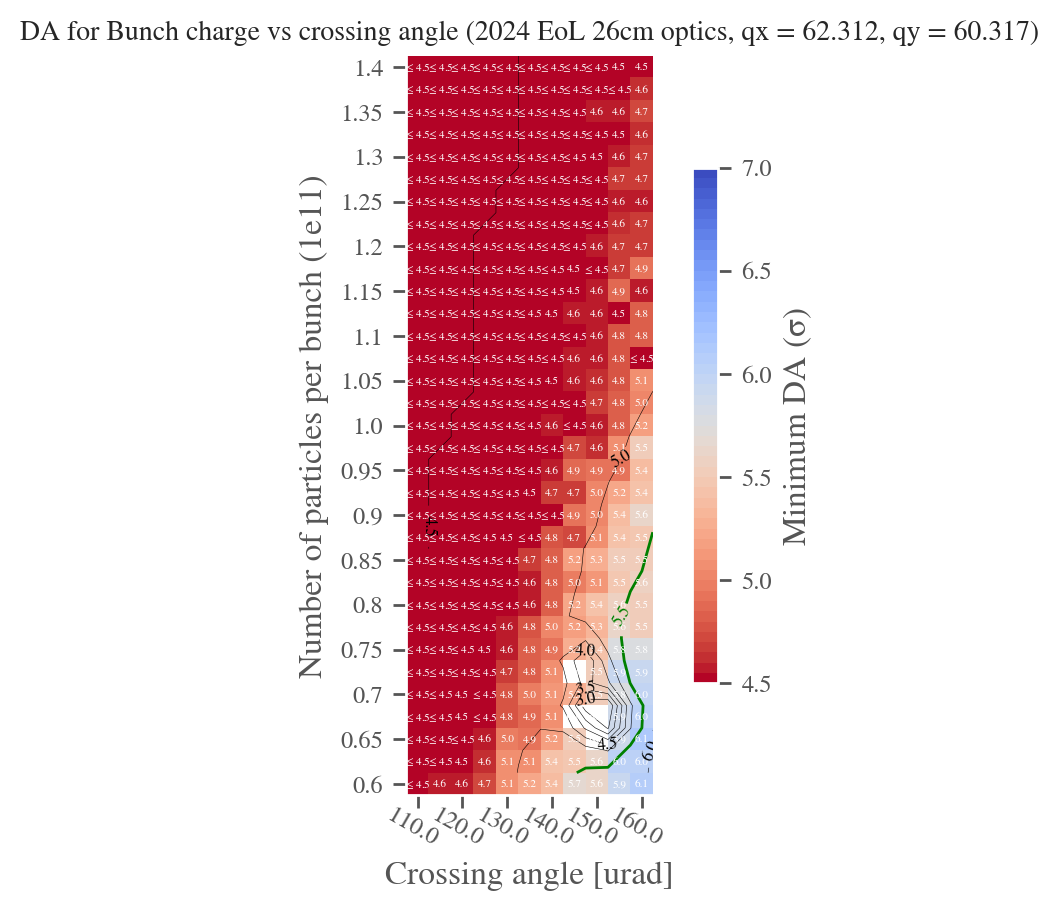

In [33]:
# Define study
STUDY_NAME = "PU_function_all_optics_lower_WPs"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add collider to columns
df_copy = df.reset_index(level=1).copy()
l_df_26_cm = []
for (qx,qy) in [(62.310,60.315), (62.311,60.316), (62.312, 60.317)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_26_cm.append(df_to_plot.copy())

    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 26cm optics, qx = {qx}, qy = {qy})"
    )

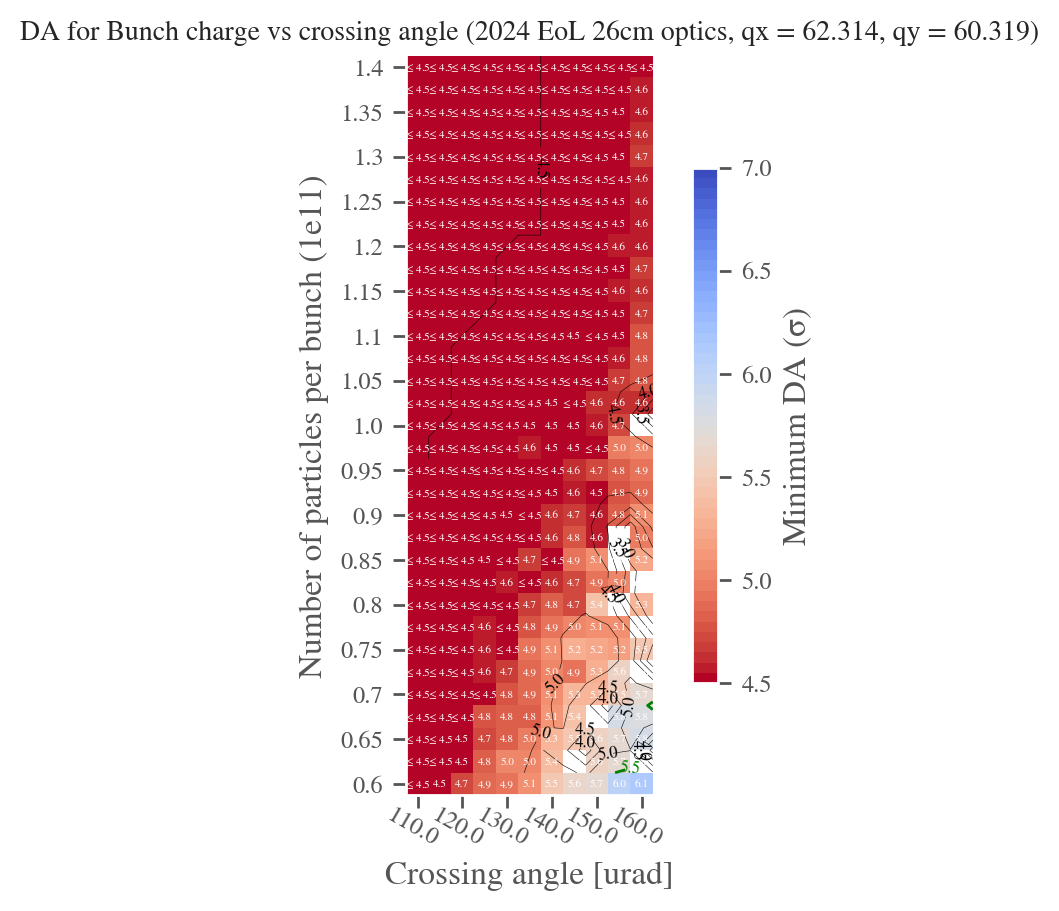

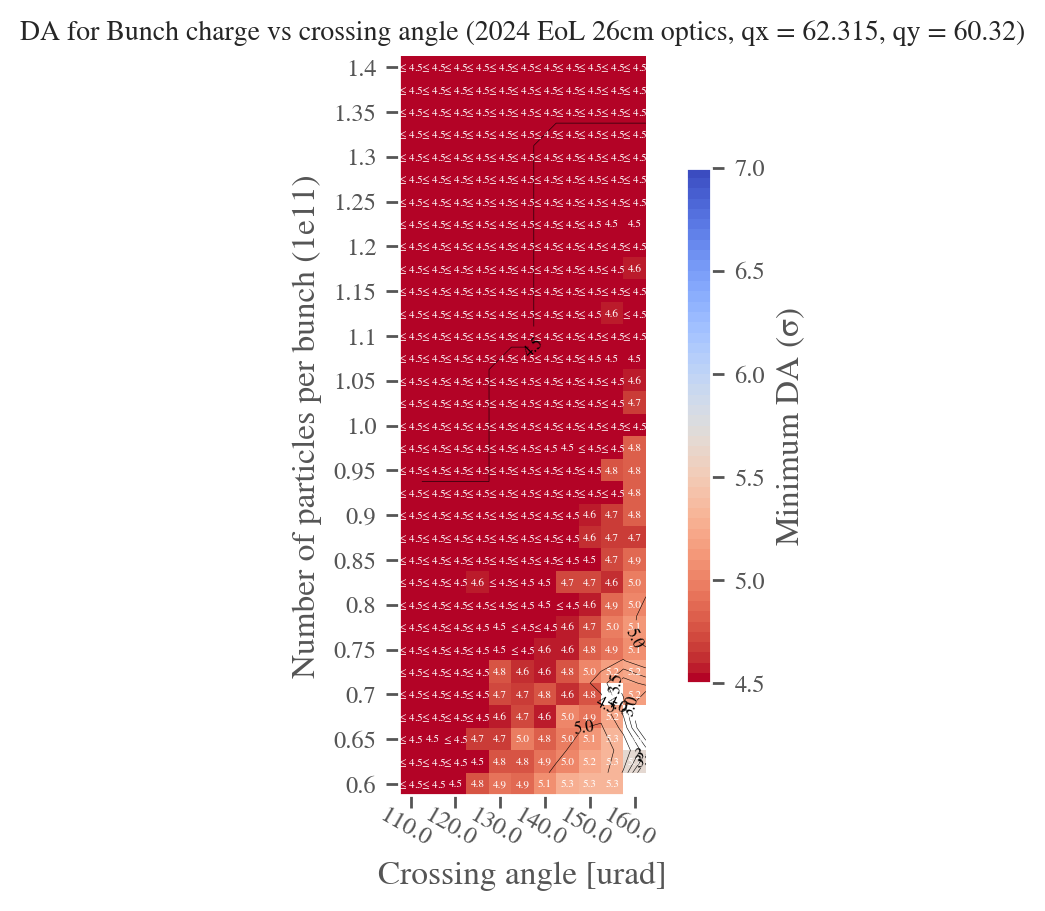

In [34]:
# Define study
STUDY_NAME = "PU_function_all_optics_higher_WPs"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add collider to columns
df_copy = df.reset_index(level=1).copy()
# l_df_26_cm = []
for (qx,qy) in [(62.314,60.319), (62.315,60.320)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_26_cm.append(df_to_plot.copy())

    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 26cm optics, qx = {qx}, qy = {qy})"
    )

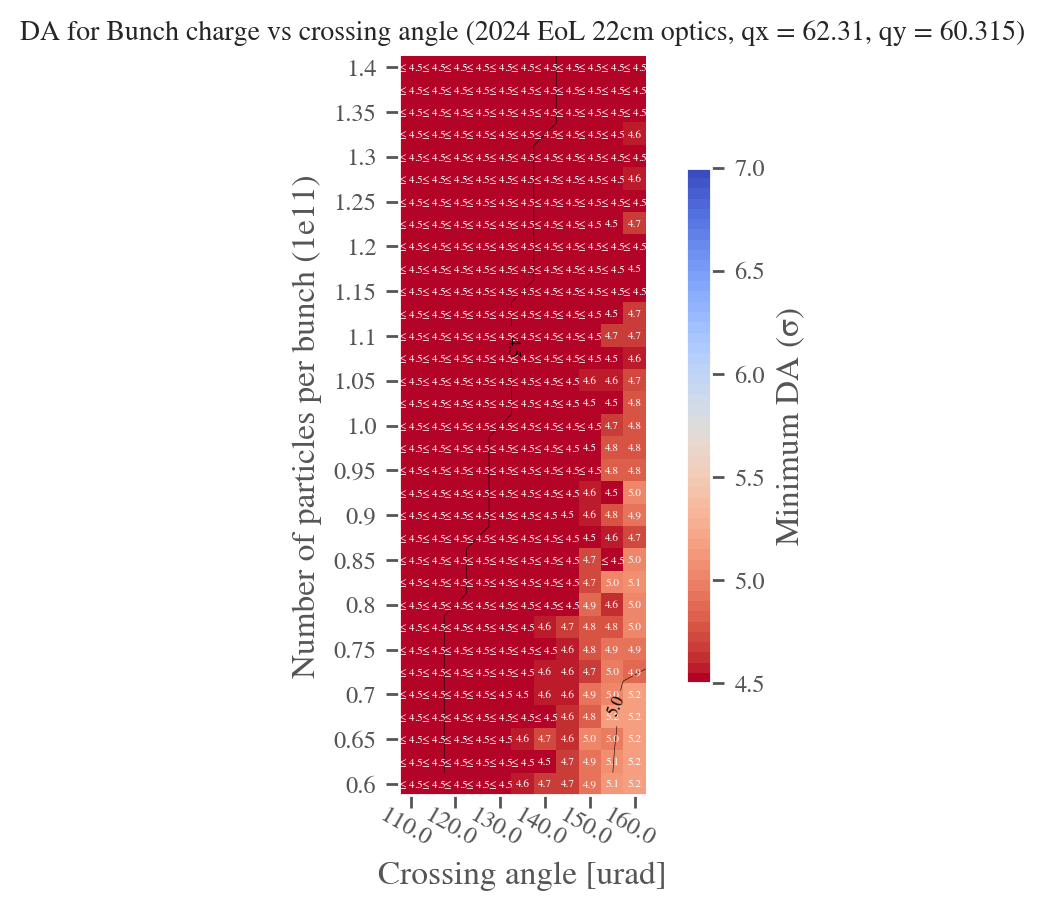

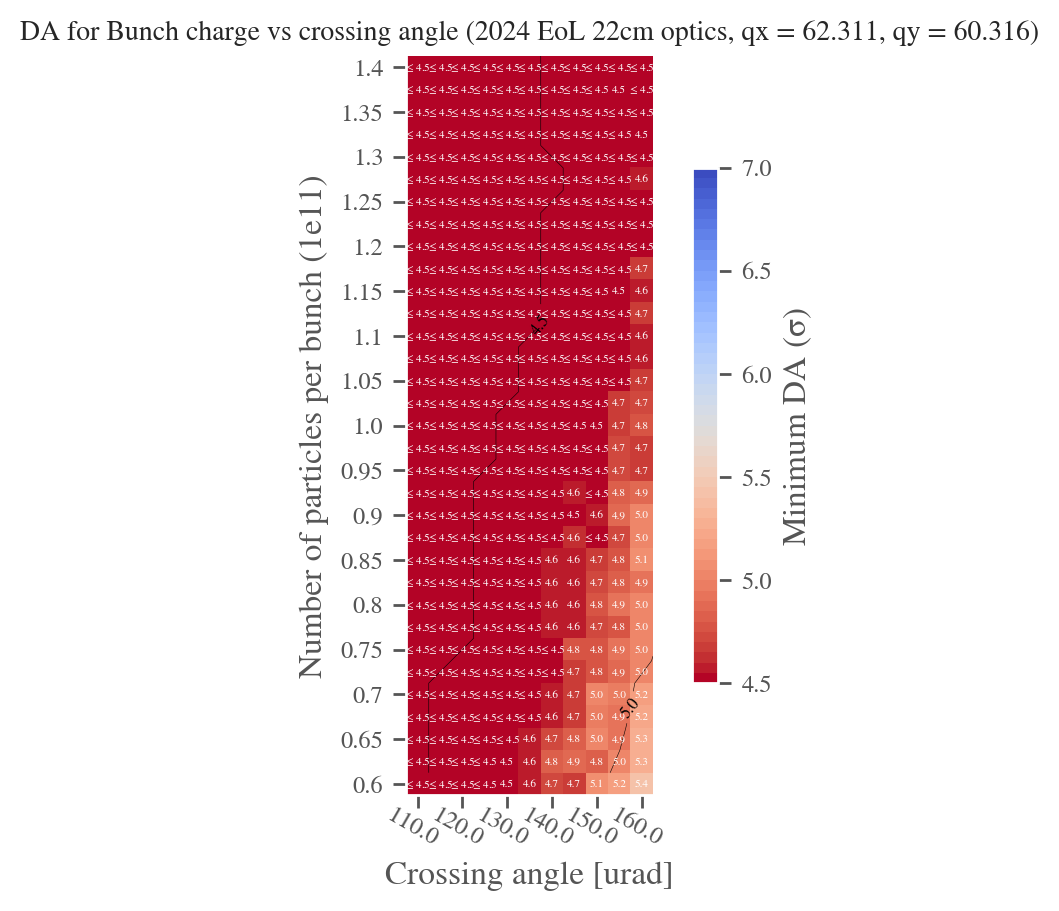

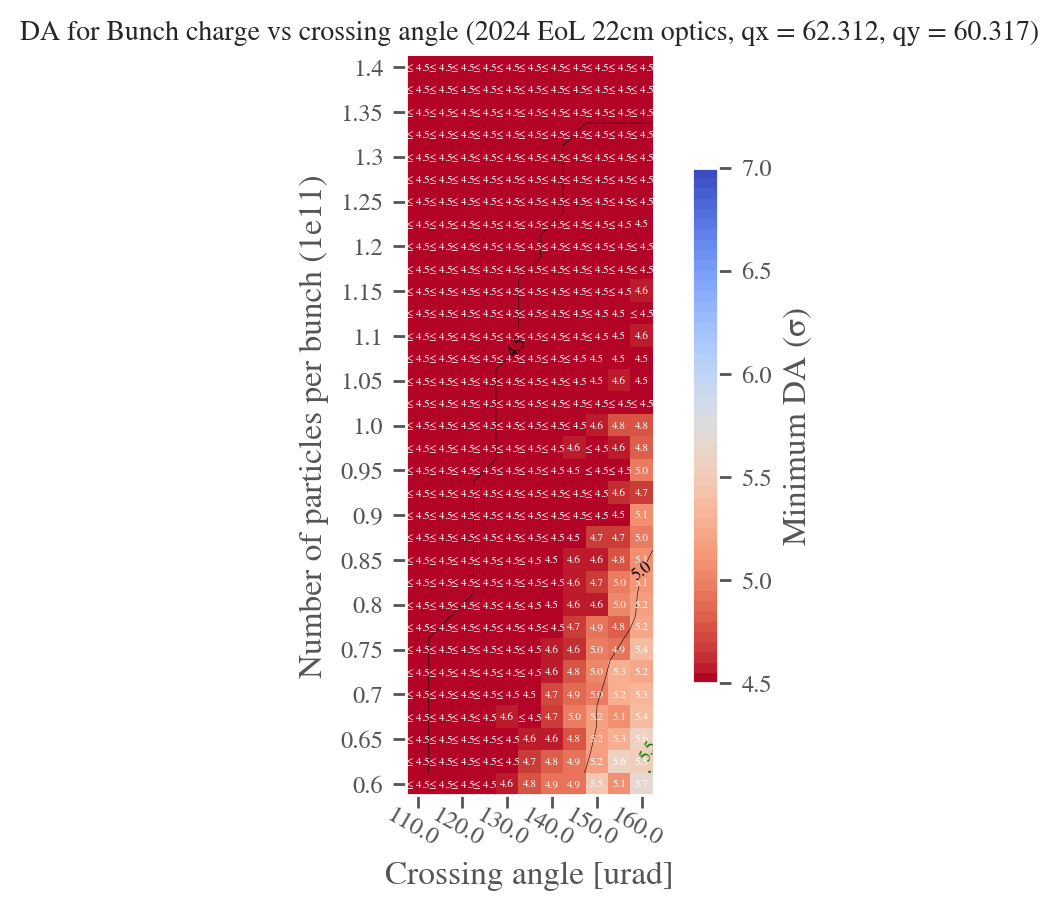

In [35]:
# Define study
STUDY_NAME = "PU_function_all_optics_lower_WPs"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add collider to columns
df_copy = df.reset_index(level=1).copy()
l_df_22cm = []
for (qx,qy) in [(62.310,60.315), (62.311,60.316), (62.312, 60.317)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_22cm.append(df_to_plot.copy())
    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 22cm optics, qx = {qx}, qy = {qy})"
    )

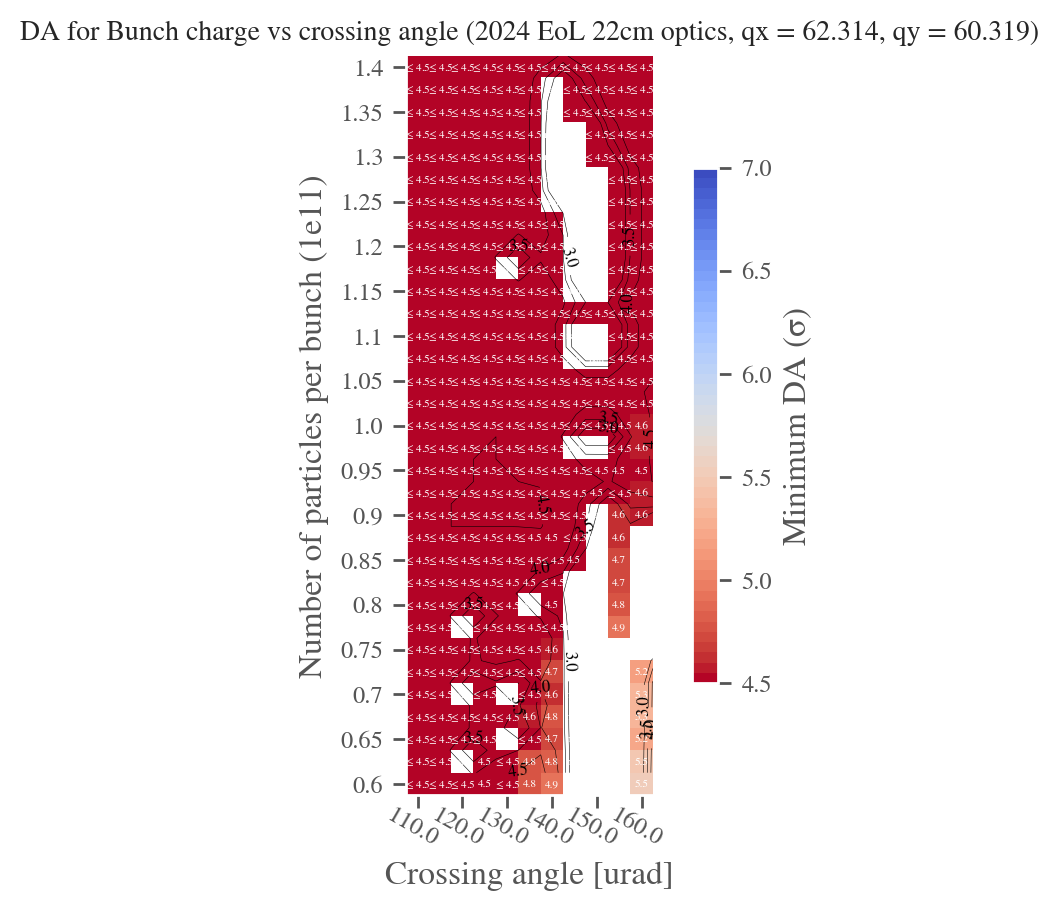

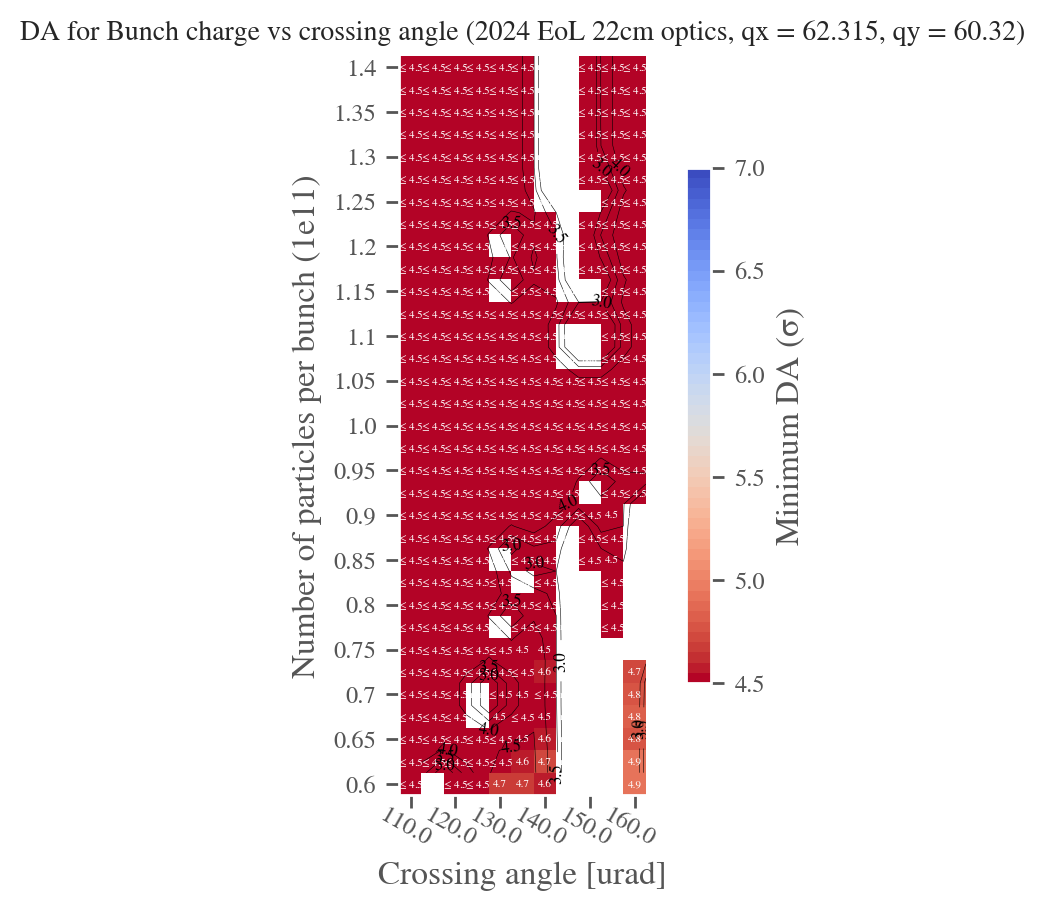

In [36]:
# Define study
STUDY_NAME = "PU_function_all_optics_higher_WPs"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Add collider to columns
df_copy = df.reset_index(level=1).copy()
# l_df_22cm = []
for (qx,qy) in [(62.314,60.319), (62.315,60.320)]:
    # Keep only relevant collider and WP
    df = df_copy[(df_copy["name base collider"] == COLLIDER) & (df_copy["qx"] == qx) & (df_copy["qy"] == qy)]

    # Reshape for plotting
    df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
    df_to_plot.index /= 1e11
    # df_to_plot
    l_df_22cm.append(df_to_plot.copy())
    # Load configuration files
    conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
    conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
    analysis_functions.plot_heatmap(
        df_to_plot,
        STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
        link=None,
        plot_contours=True,
        conf_mad=conf_mad,
        conf_collider=conf_collider,
        type_crossing="flatvh",
        betx=0.3,
        bety=0.3,
        Nb = False,
        green_contour = 5.5,
        extended_diagonal=False,
        symmetric=False,
        mask_lower_triangle=False,
        xlabel="Crossing angle [urad]",
        ylabel="Number of particles per bunch (1e11)",
        vmin = 4.5,
        vmax = 7.,
        plot_diagonal_lines= False,
        xaxis_ticks_on_top=False,
        title=f"DA for Bunch charge vs crossing angle (2024 EoL 22cm optics, qx = {qx}, qy = {qy})"
    )

### Interpolated optics

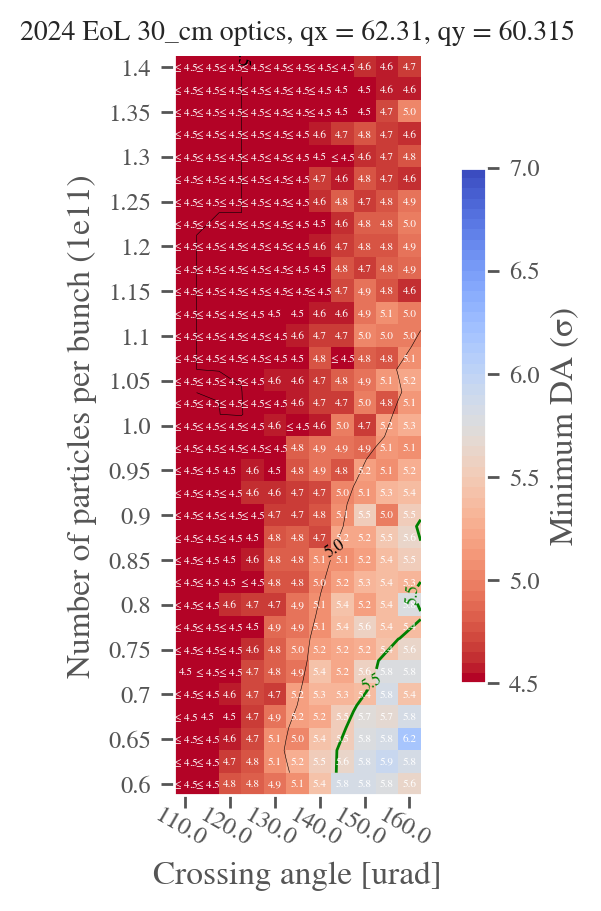

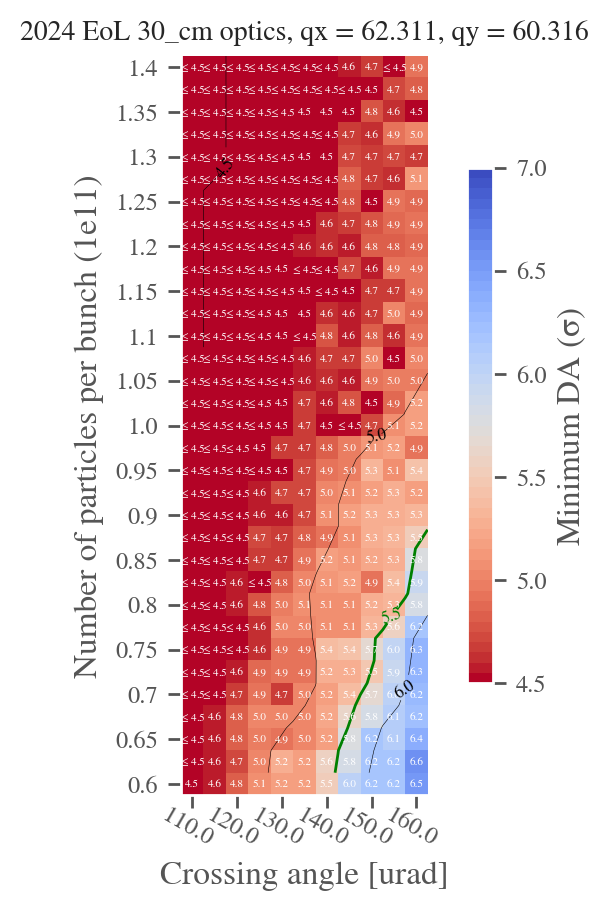

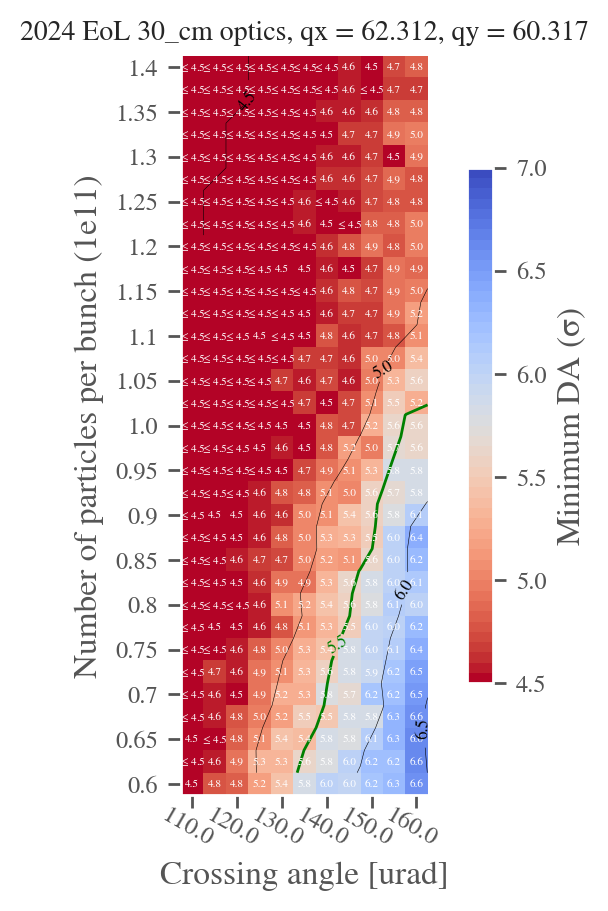

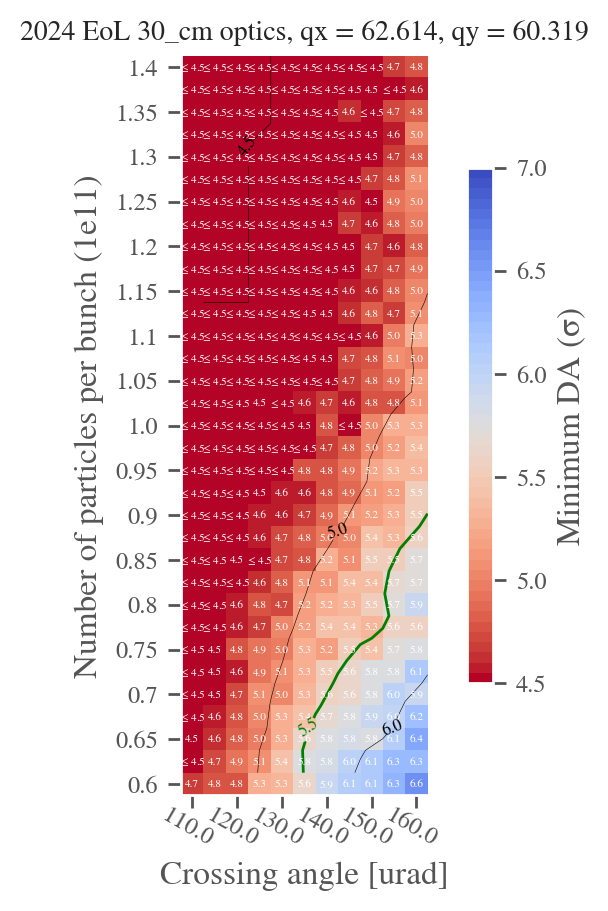

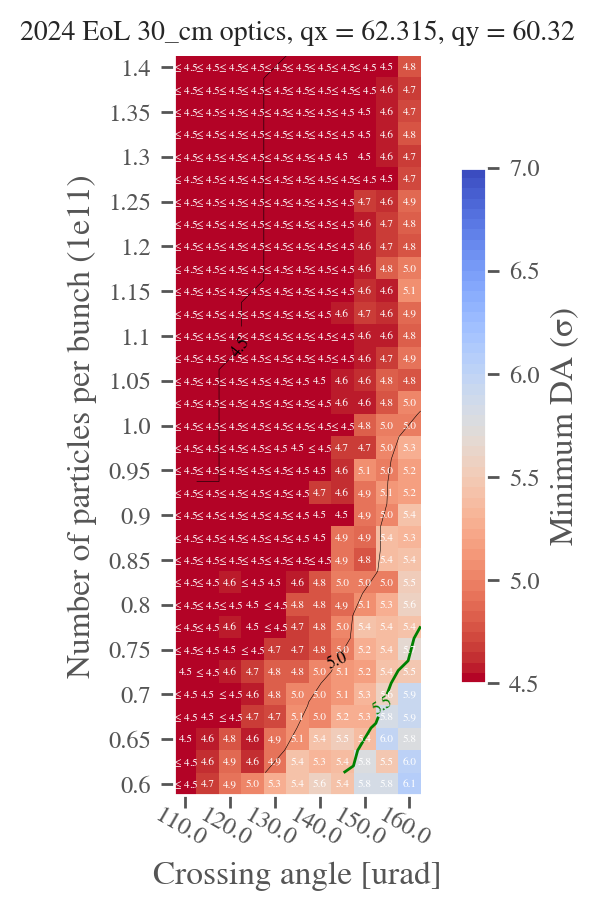

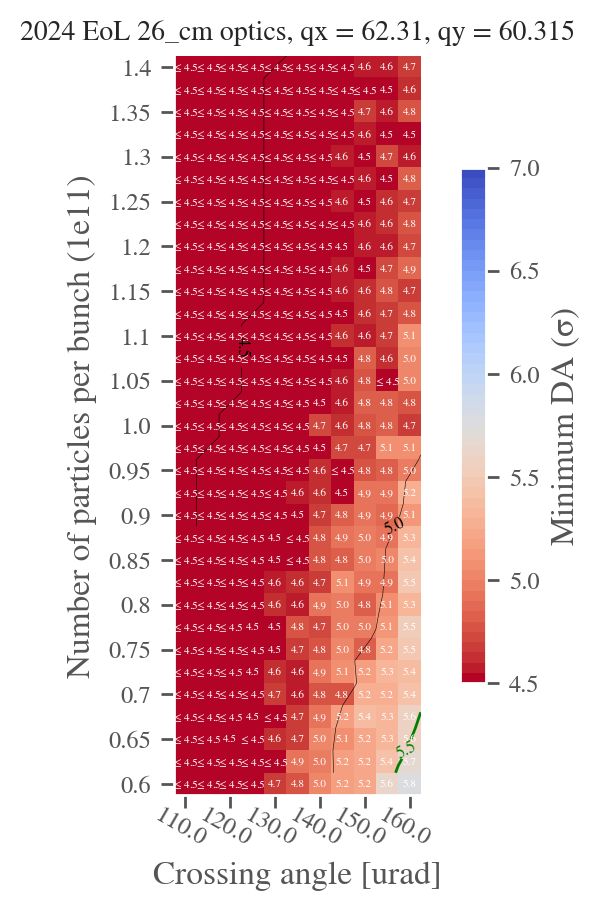

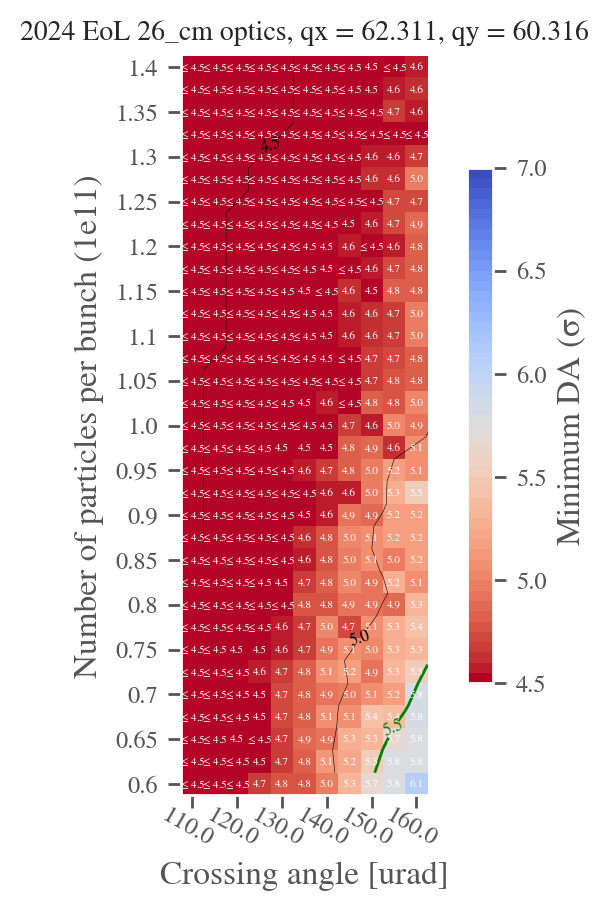

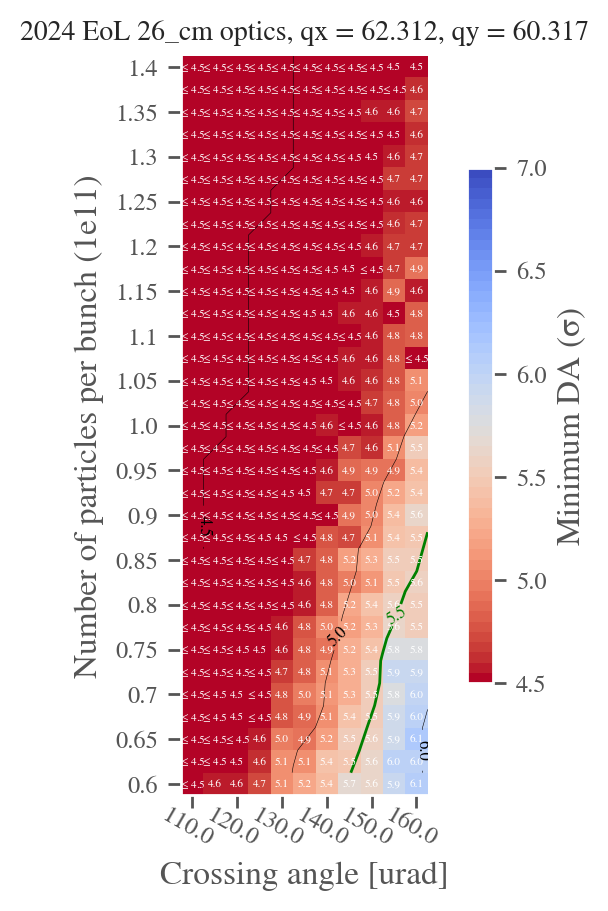

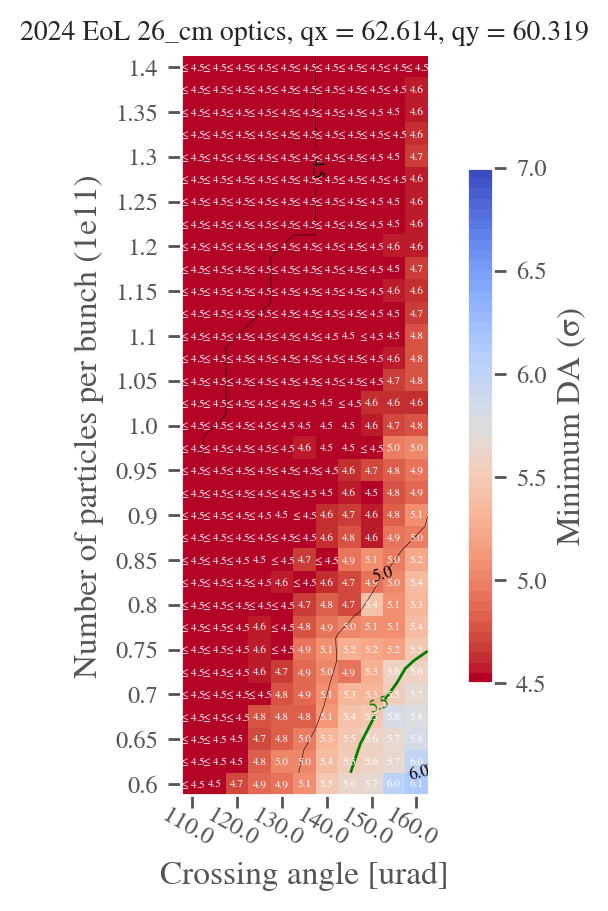

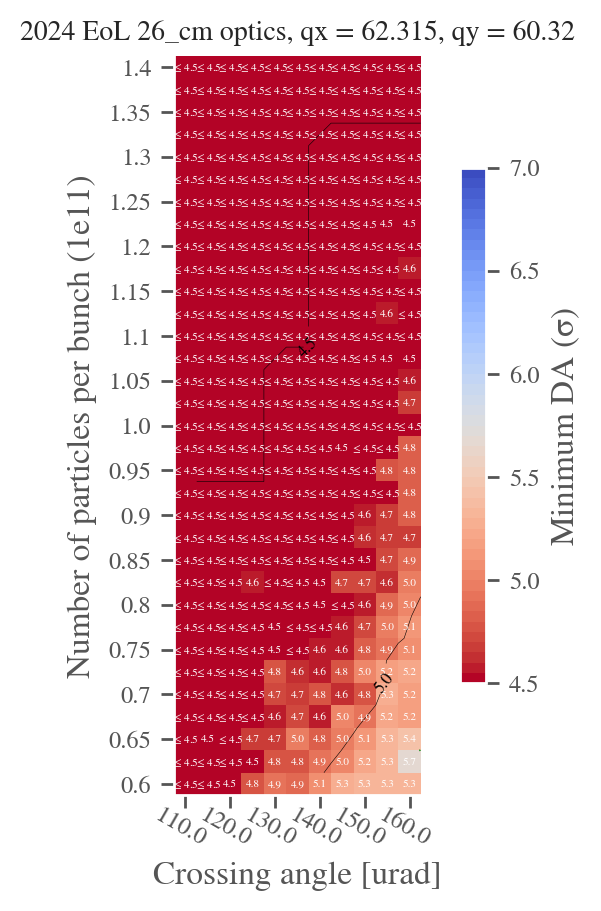

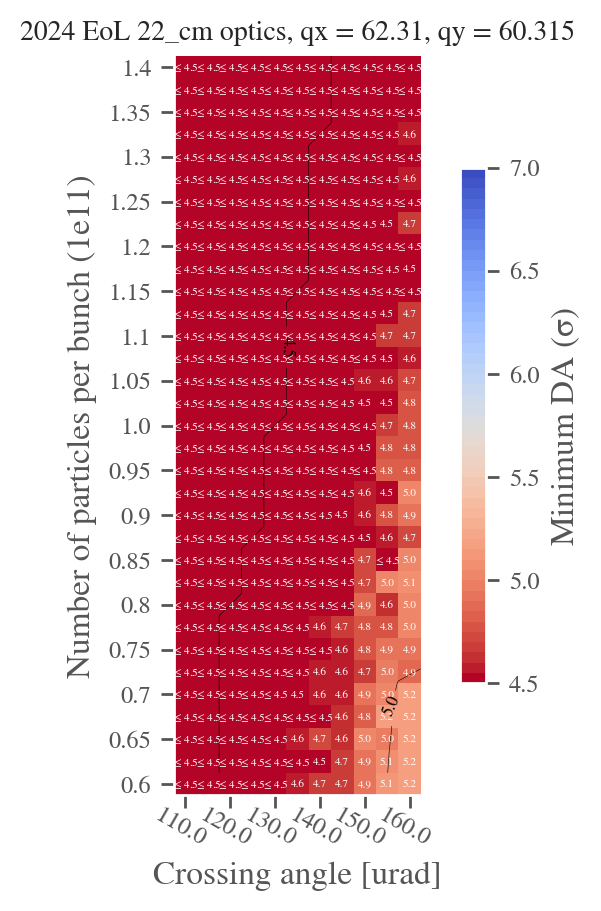

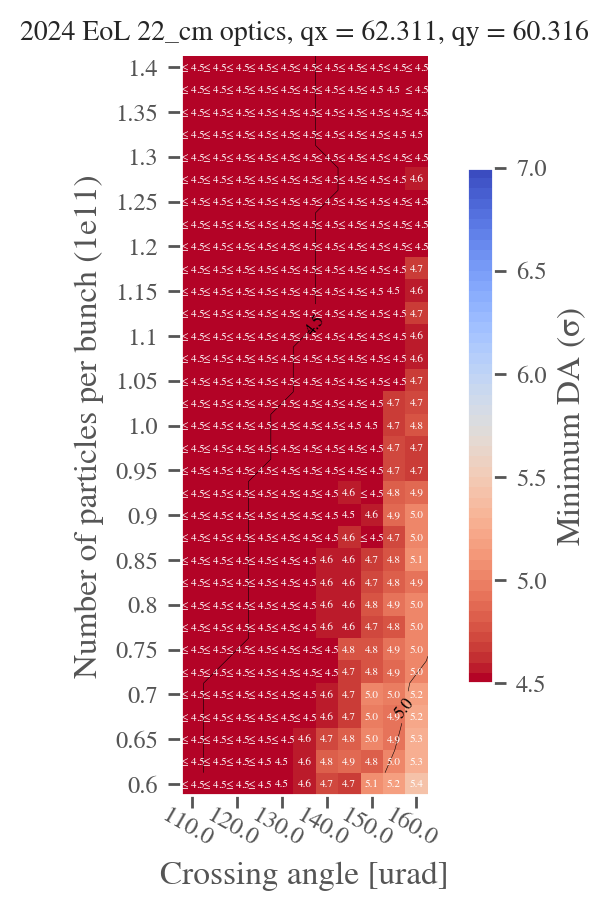

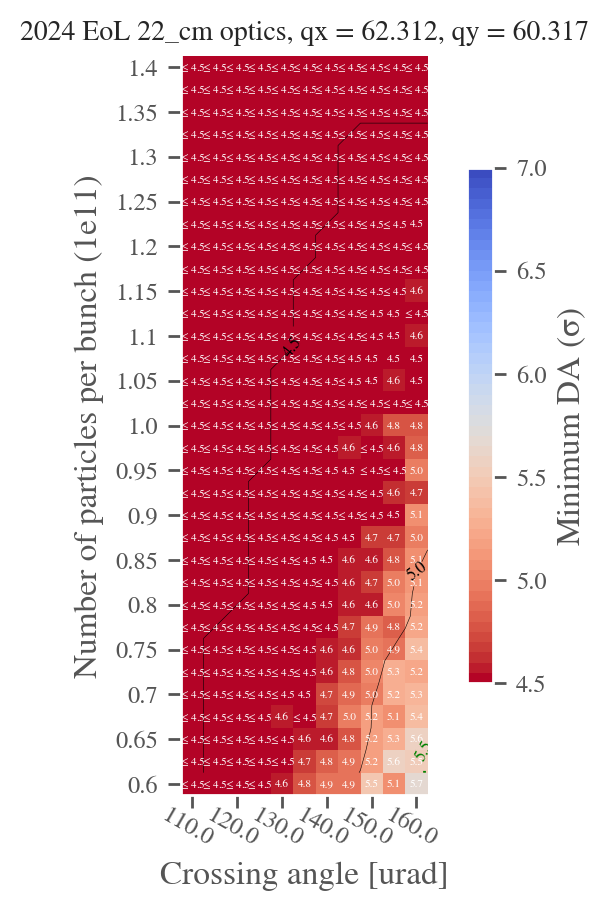

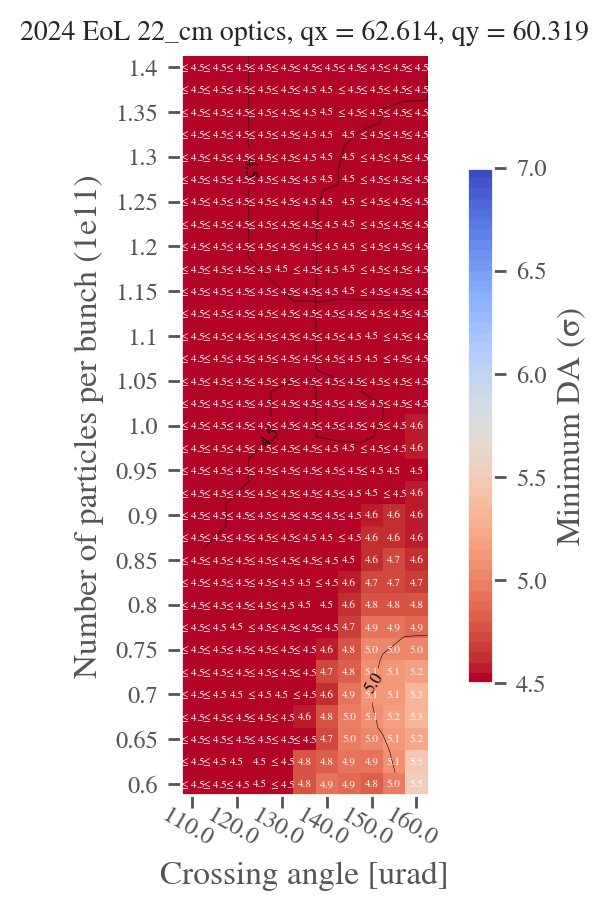

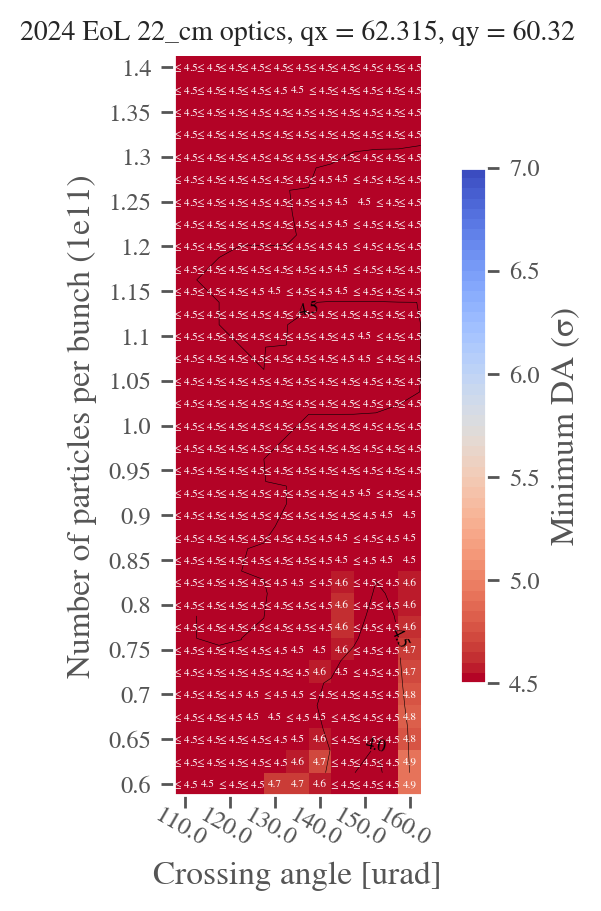

In [37]:
ll_interpolated_df = []
for optics, l_df in zip(["30_cm", "26_cm", "22_cm"], [l_df_30_cm, l_df_26_cm, l_df_22cm]):
    l_interpolated_df = []
    for df, (qx, qy) in zip(
        l_df,
        [(62.310, 60.315), (62.311, 60.316), (62.312, 60.317), (62.614, 60.319), (62.315, 60.320)],
    ):
        x = df.index
        y = df.columns
        array = np.ma.masked_invalid(df.values.T)
        xx, yy = np.meshgrid(x, y)
        # get only the valid values
        x1 = xx[~array.mask]
        y1 = yy[~array.mask]
        newarr = array[~array.mask]
        interpolated_grid = interpolate.griddata((x1, y1), newarr.ravel(), (xx, yy), method="cubic")
        interpolate_df = pd.DataFrame(interpolated_grid.T).interpolate(axis=1)
        interpolate_df.index = df.index
        interpolate_df.columns = df.columns
        l_interpolated_df.append(interpolate_df)
        conf_mad = analysis_functions.load_config(CONF_MAD_PATH)["config_mad"]
        conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
        analysis_functions.plot_heatmap(
            interpolate_df,
            f"{optics}_interpolated_{qx}_{qy}",
            link=None,
            plot_contours=True,
            conf_mad=conf_mad,
            conf_collider=conf_collider,
            type_crossing="flatvh",
            betx=0.3,
            bety=0.3,
            Nb=False,
            green_contour=5.5,
            extended_diagonal=False,
            symmetric=False,
            mask_lower_triangle=False,
            xlabel="Crossing angle [urad]",
            ylabel="Number of particles per bunch (1e11)",
            vmin=4.5,
            vmax=7.0,
            plot_diagonal_lines=False,
            xaxis_ticks_on_top=False,
            title=f"2024 EoL {optics} optics, qx = {qx}, qy = {qy}",
        )

    ll_interpolated_df.append(l_interpolated_df)

### Find contours at 5 and 5.5 sigmas

In [38]:
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"


No contours found for level 5.5, optics 26_cm and tune (62.315,60.32)
No contours found for level 5.5, optics 22_cm and tune (62.31,60.315)
No contours found for level 5.5, optics 22_cm and tune (62.311,60.316)
No contours found for level 5.5, optics 22_cm and tune (62.312,60.317)
No contours found for level 5.5, optics 22_cm and tune (62.614,60.319)
No contours found for level 5.5, optics 22_cm and tune (62.315,60.32)


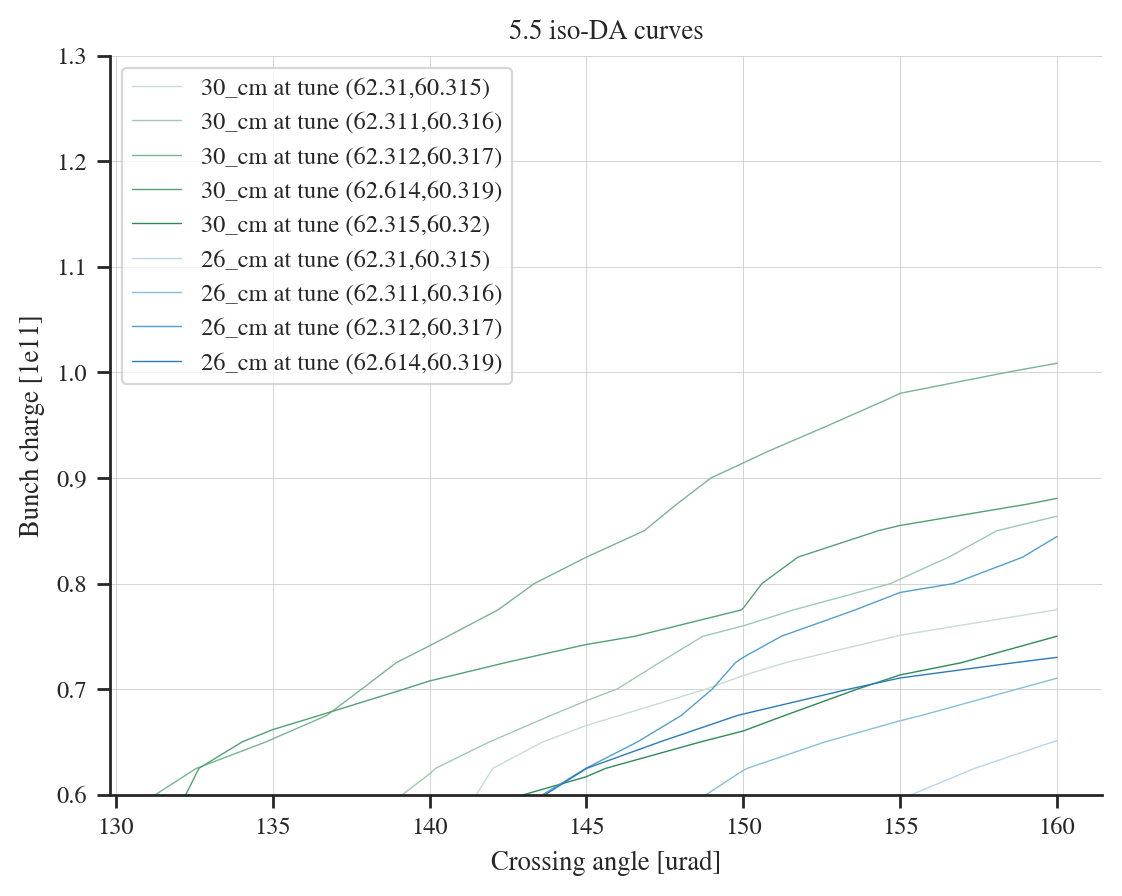

No contours found for level 5, optics 22_cm and tune (62.315,60.32)


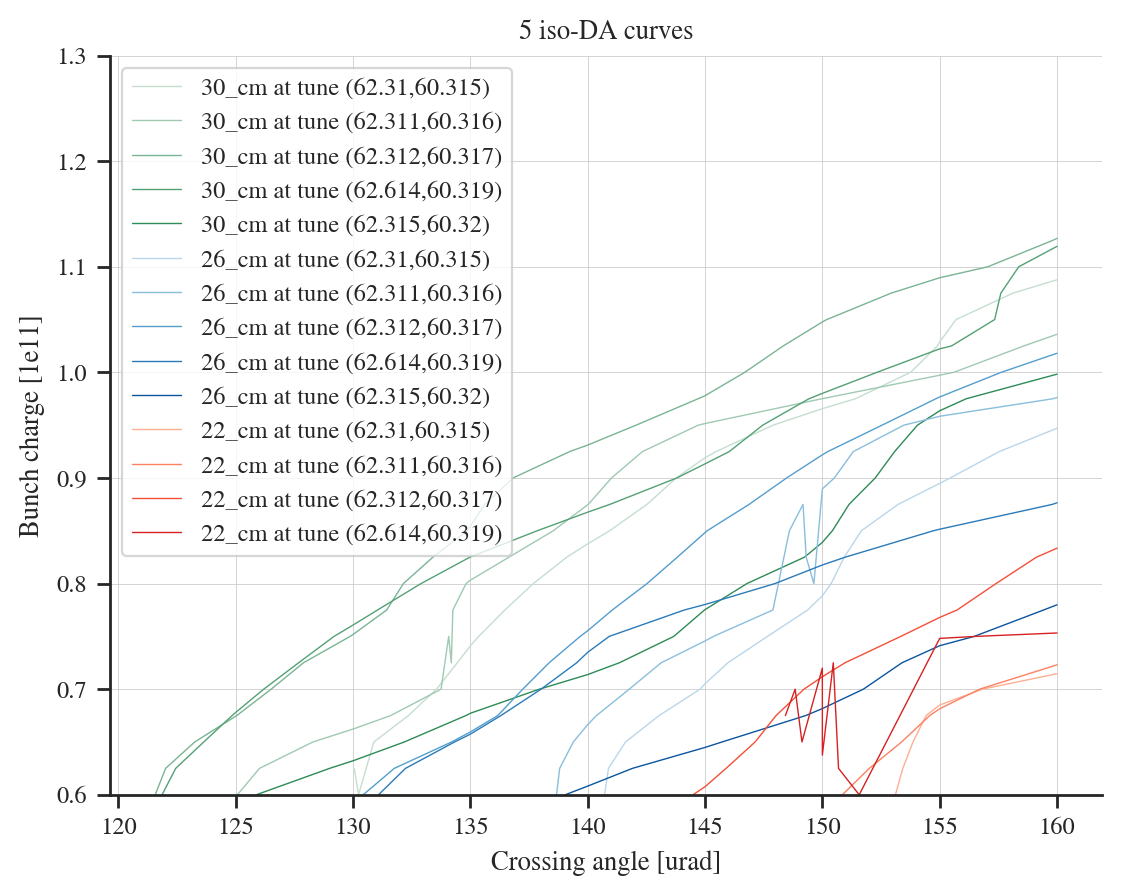

In [39]:
lll_x = []
lll_y = []
for level in [5.5, 5]:
    plt.figure()
    ll_x = []
    ll_y = []
    for optics, l_df, color_palette in zip(
        ["30_cm", "26_cm", "22_cm"],
        ll_interpolated_df,
        [
            sns.light_palette("seagreen", 6),
            sns.color_palette("Blues", 6),
            sns.color_palette("Reds", 6),
        ],
    ):
        l_x = []
        l_y = []
        for idx, (df, (qx, qy)) in enumerate(
            zip(
                l_df,
                [
                    (62.310, 60.315),
                    (62.311, 60.316),
                    (62.312, 60.317),
                    (62.614, 60.319),
                    (62.315, 60.320),
                ],
            )
        ):
            # Smooth
            smooth = gaussian_filter(df.values, sigma=1.0)

            # Get contour
            contours = find_contours(smooth, level=level)

            # fig, ax = plt.subplots(1, 1)
            # img = ax.imshow(df, origin='lower')
            # plt.colorbar(img)
            # for i in range(len(contours)):
            #     p = plt.Polygon(contours[i][:,[1,0]], fill=False, color='w', closed = False)
            #     ax.add_artist(p)
            # plt.title(f"Contours for level {level}, optics {optics} and tune ({qx},{qy})")
            # plt.show()

            # Extract curve
            try:
                contour_for_extraction = contours[0][contours[0][:, 1].argsort()]
            except:
                print(f"No contours found for level {level}, optics {optics} and tune ({qx},{qy})")
                continue

            x = contour_for_extraction[:, 1]
            y = contour_for_extraction[:, 0]

            # # Convert back to initial units
            f1 = interpolate.interp1d(range(len(l_df_30_cm[0].index)), l_df_30_cm[0].index)
            f2 = interpolate.interp1d(range(len(l_df_30_cm[0].columns)), l_df_30_cm[0].columns)

            x_real = f2(x)
            y_real = f1(y)

            l_x.append(x_real)
            l_y.append(y_real)
            plt.plot(
                x_real,
                y_real,
                label=f"{optics} at tune ({qx},{qy})",
                c=color_palette[idx + 1],
            )
        ll_x.append(l_x)
        ll_y.append(l_y)
    lll_x.append(ll_x)
    lll_y.append(ll_y)

    plt.xlabel("Crossing angle [urad]")
    plt.ylabel("Bunch charge [1e11]")
    plt.title(f"{level} iso-DA curves")
    plt.ylim(0.6, 1.3)
    plt.legend()
    plt.grid()
    # plt.savefig(f"plots/iso_DA_{level}_other_WPs.pdf")
    plt.show()

### Get the conversion bunch charge -> P  for each optics

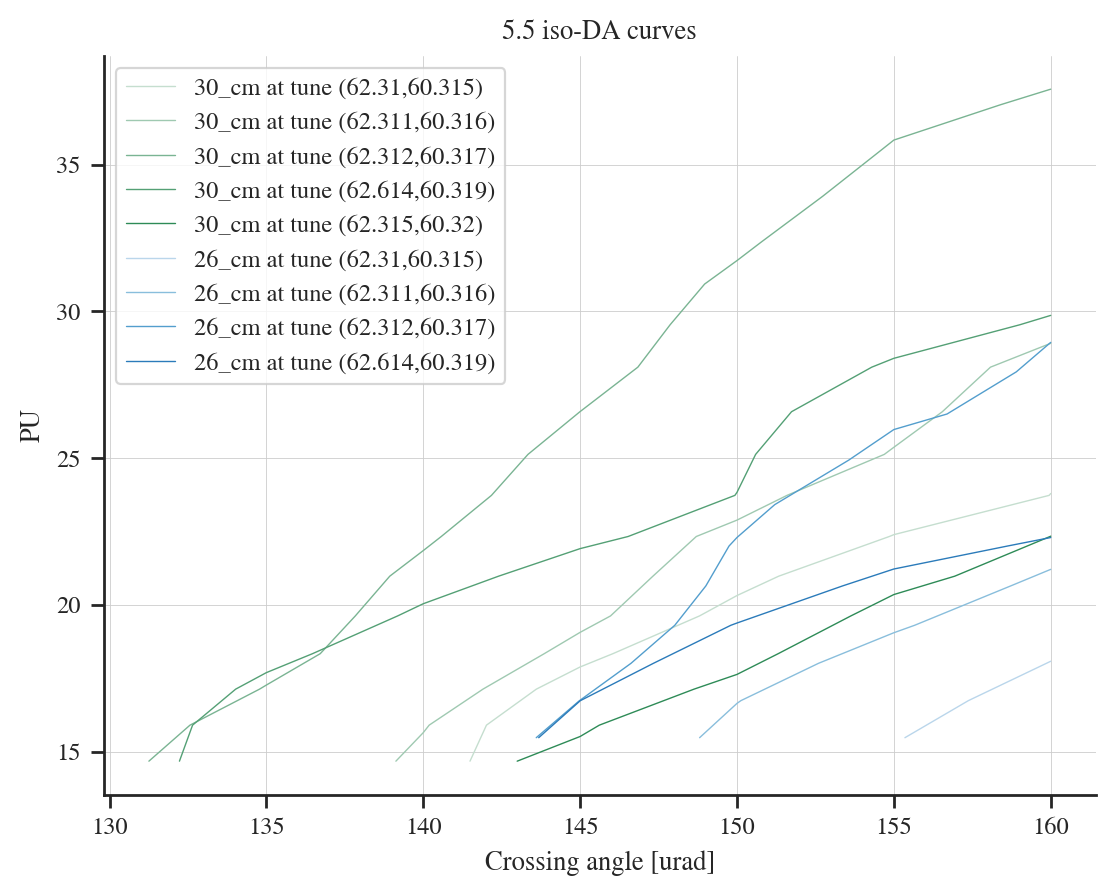

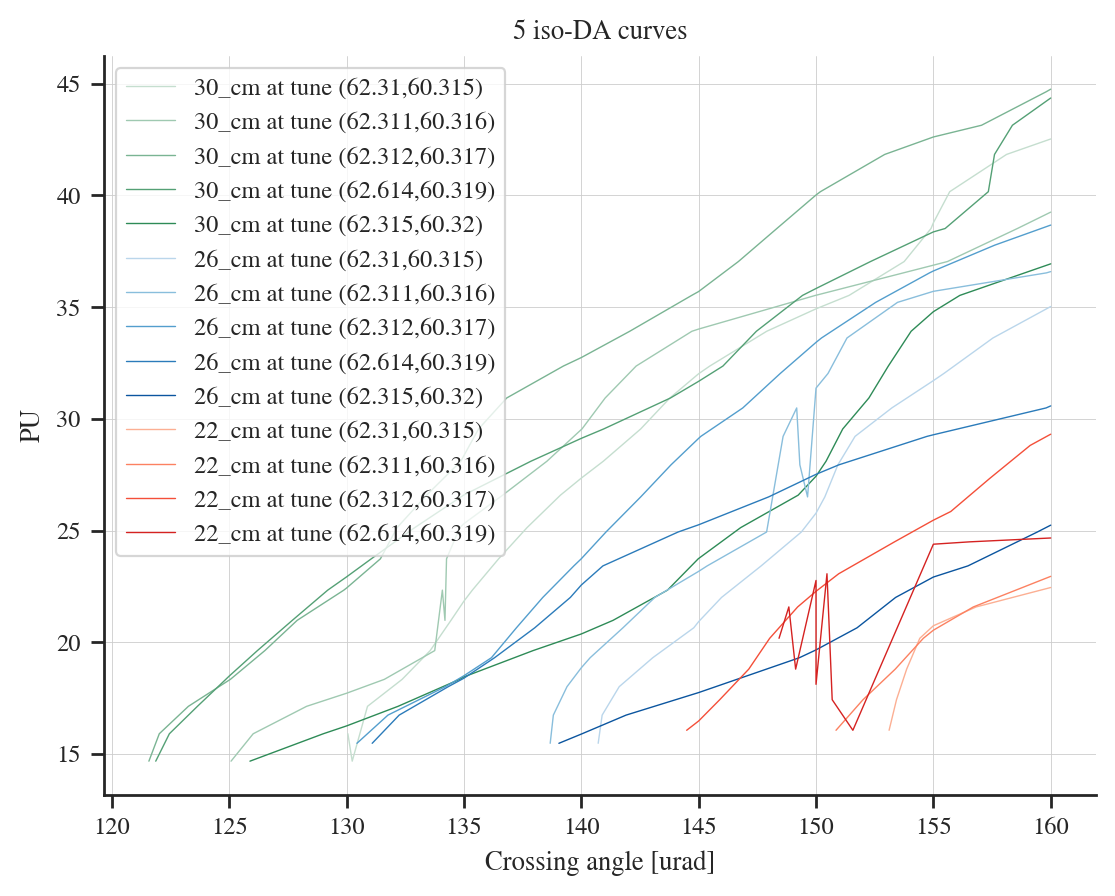

In [40]:
lll_y_PU = []
for level, ll_x, ll_y in zip([5.5, 5], lll_x, lll_y):
    plt.figure()
    ll_y_PU = []
    for optics, l_df, color_palette, l_x, l_y, f_nb_to_PU in zip(
        ["30_cm", "26_cm", "22_cm"],
        ll_interpolated_df,
        [
            sns.light_palette("seagreen", 6),
            sns.color_palette("Blues", 6),
            sns.color_palette("Reds", 6),
        ],
        ll_x,
        ll_y,
        [f_nb_to_PU_30cm, f_nb_to_PU_26cm, f_nb_to_PU_22cm],
    ):
        l_y_PU = []
        for idx, (df, (qx, qy), x, y) in enumerate(
            zip(
                l_df,
                [
                    (62.310, 60.315),
                    (62.311, 60.316),
                    (62.312, 60.317),
                    (62.614, 60.319),
                    (62.315, 60.320),
                ],
                l_x,
                l_y,
            )
        ):
            y_PU = f_nb_to_PU(y)
            l_y_PU.append(y_PU)
            plt.plot(
                x,
                y_PU,
                label=f"{optics} at tune ({qx},{qy})",
                c=color_palette[idx + 1],
            )
        ll_y_PU.append(l_y_PU)
    lll_y_PU.append(ll_y_PU)
    plt.xlabel("Crossing angle [urad]")
    plt.ylabel("PU")
    plt.title(f"{level} iso-DA curves")
    # plt.ylim(0.6, 1.3)
    plt.legend()
    plt.grid()
    # plt.savefig(f"plots/iso_PU_{level}_other_WPs.pdf")
    plt.show()

### Add missing curve and smooth

In [41]:
#5.5, 30cm, 62.313, 60.318
lll_x[0][0].insert(3, x_real_30cm)
lll_x[0][1].insert(3, x_real_26cm)
lll_x[0][2].insert(3, x_real_22cm)
lll_x[1][0].insert(3, x_real_30cm_5sig)
lll_x[1][1].insert(3, x_real_26cm_5sig)
lll_x[1][2].insert(3, x_real_22cm_5sig)

lll_y_PU[0][0].insert(3, ll_PU[0])
lll_y_PU[0][1].insert(3, ll_PU[1])
lll_y_PU[0][2].insert(3, ll_PU[2])
lll_y_PU[1][0].insert(3, ll_PU_5sig[0])
lll_y_PU[1][1].insert(3, ll_PU_5sig[1])
lll_y_PU[1][2].insert(3, ll_PU_5sig[2])

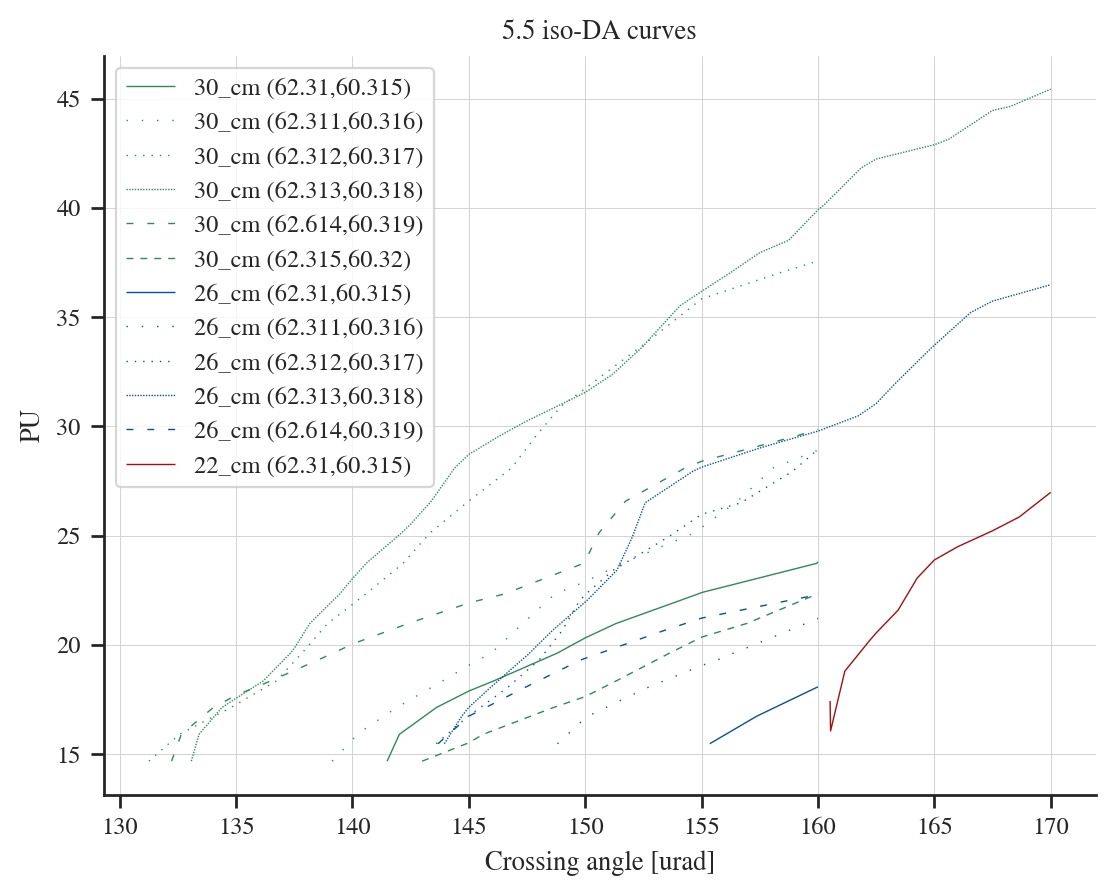

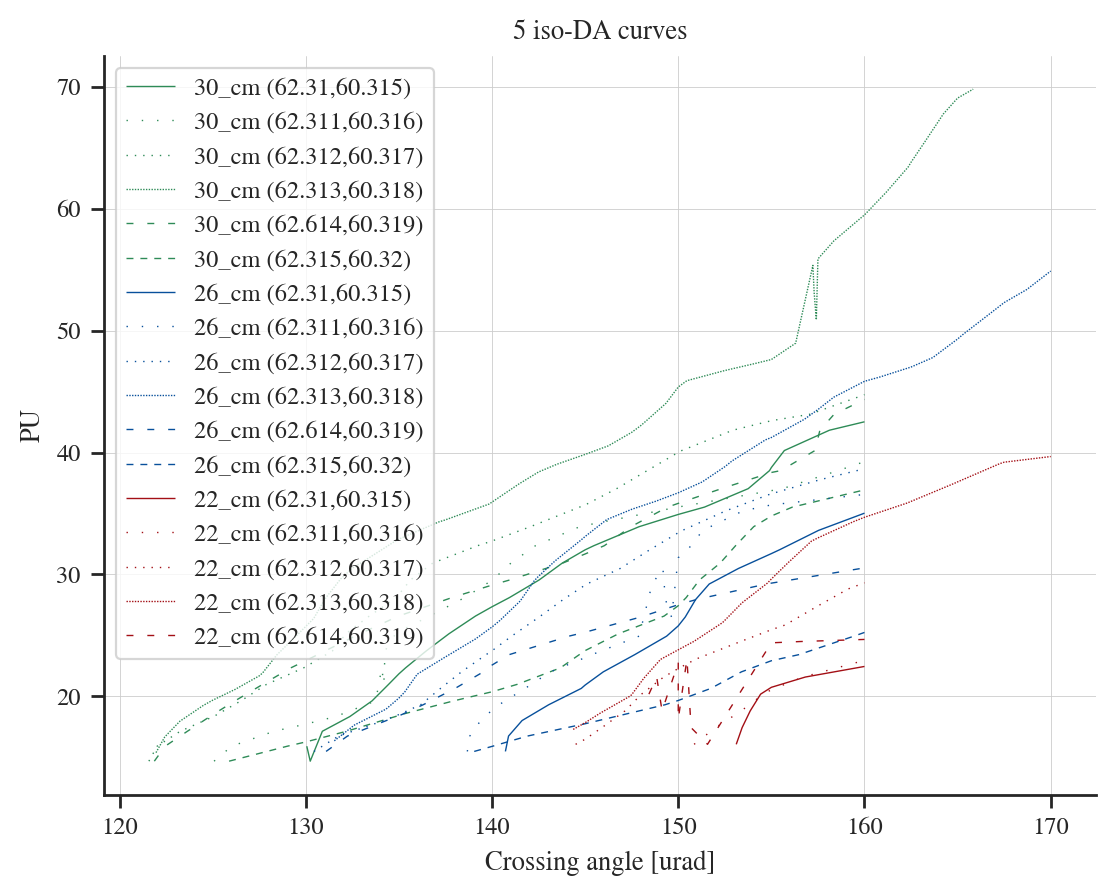

In [47]:
from collections import OrderedDict

linestyle = OrderedDict(
    [('solid',               (0, ())),
     ('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('densely dotted',      (0, (1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

for level, ll_x, ll_y_PU in zip([5.5, 5], lll_x, lll_y_PU):
    plt.figure()
    for optics, color_palette, l_x, l_y_PU, f_nb_to_PU in zip(
        ["30_cm", "26_cm", "22_cm"],
        [
            sns.light_palette("seagreen", 7),
            sns.color_palette("Blues", 7),
            sns.color_palette("Reds", 7),
        ],
        ll_x,
        ll_y_PU,
        [f_nb_to_PU_30cm, f_nb_to_PU_26cm, f_nb_to_PU_22cm],
    ):
        for idx, ((qx, qy), x, y_PU) in enumerate(
            zip(
                [
                    (62.310, 60.315),
                    (62.311, 60.316),
                    (62.312, 60.317),
                    (62.313, 60.318),
                    (62.614, 60.319),
                    (62.315, 60.320),
                ],
                l_x,
                l_y_PU,
            )
        ):
            plt.plot(
                x,
                y_PU,
                label=f"{optics} ({qx},{qy})",
                c=color_palette[-1],
                ls = list(linestyle.values())[idx]
            )
    plt.xlabel("Crossing angle [urad]")
    plt.ylabel("PU")
    plt.title(f"{level} iso-DA curves")
    # plt.ylim(0.6, 1.3)
    plt.legend()
    plt.grid()
    plt.savefig(f"plots/iso_PU_{level}_final_unsmoothed.pdf")
    plt.show()

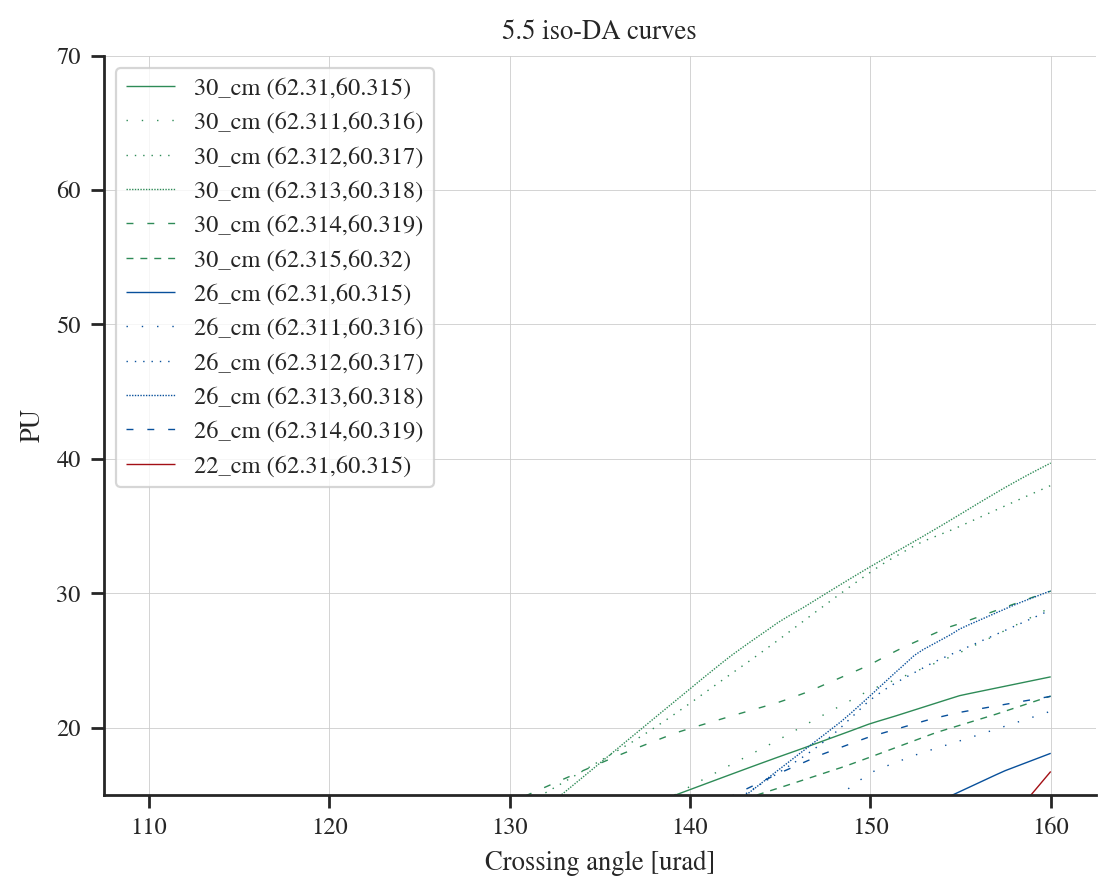

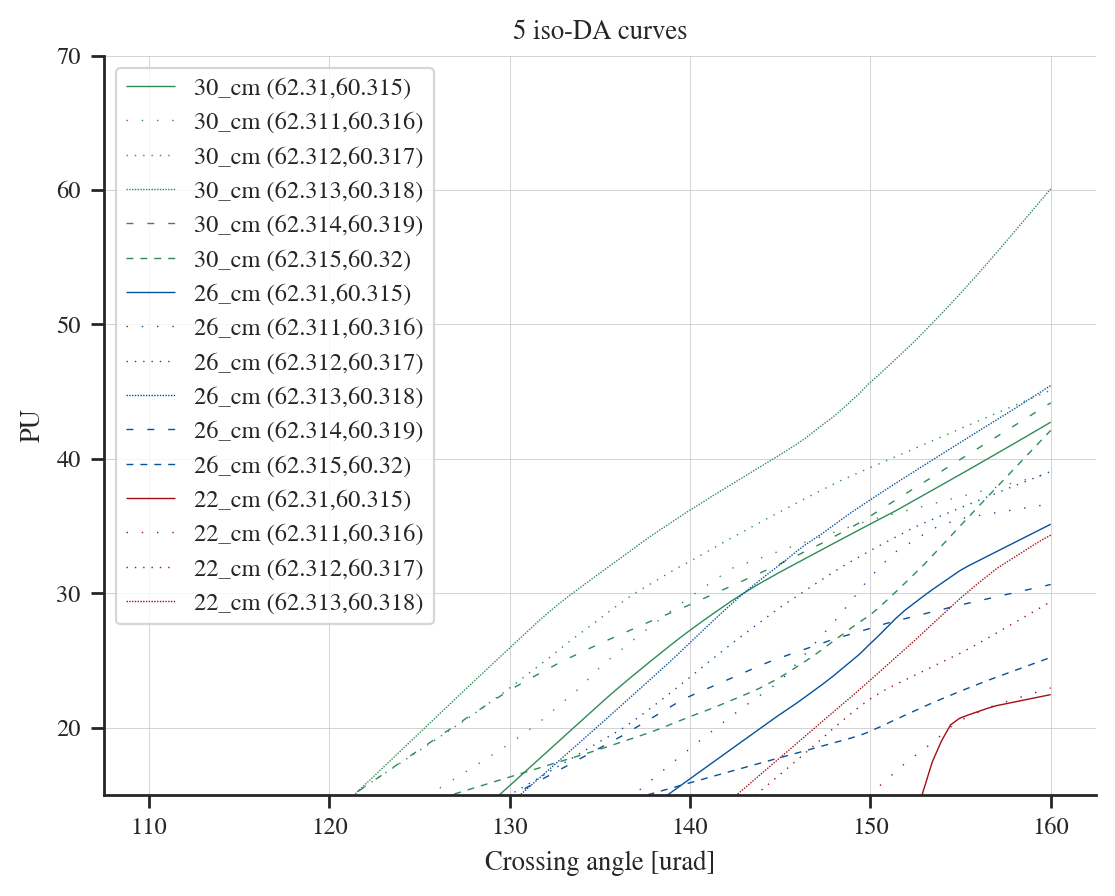

In [48]:
import statsmodels.api as sm


for level, ll_x, ll_y_PU in zip([5.5, 5], lll_x, lll_y_PU):
    plt.figure()
    for optics, color_palette, l_x, l_y_PU, f_nb_to_PU in zip(
        ["30_cm", "26_cm", "22_cm"],
        [
            sns.light_palette("seagreen", 7),
            sns.color_palette("Blues", 7),
            sns.color_palette("Reds", 7),
        ],
        ll_x,
        ll_y_PU,
        [f_nb_to_PU_30cm, f_nb_to_PU_26cm, f_nb_to_PU_22cm],
    ):
        for idx, ((qx, qy), x, y_PU) in enumerate(
            zip(
                [
                    (62.310, 60.315),
                    (62.311, 60.316),
                    (62.312, 60.317),
                    (62.313, 60.318),
                    (62.314, 60.319),
                    (62.315, 60.320),
                ],
                l_x,
                l_y_PU,
            )
        ):
            # lowess will return our "smoothed" data with a y value for at every x-value
            lowess = sm.nonparametric.lowess(y_PU, x, frac=0.5)

            # unpack the lowess smoothed points to their values
            lowess_x = list(zip(*lowess))[0]
            lowess_y = list(zip(*lowess))[1]

            # Remove duplicates
            new_x = []
            new_y = []
            for x, y in zip(lowess_x, lowess_y):
                if x not in new_x:
                    new_x.append(x)
                    new_y.append(y)

            if optics == "22_cm" and qx == 62.314:
                f = interpolate.interp1d(
                    new_x[1:],
                    new_y[1:],
                    kind="slinear",
                    bounds_error=False,
                    fill_value="extrapolate",
                )
            else:
                f = interpolate.interp1d(
                    new_x[:], new_y[:], kind="slinear", bounds_error=False, fill_value="extrapolate"
                )
                angle_range = np.linspace(110, 160, 100)

                plt.plot(
                    angle_range,
                    f(angle_range),
                    label=f"{optics} ({qx},{qy})",
                    c=color_palette[-1],
                    ls = list(linestyle.values())[idx]
                )
    plt.xlabel("Crossing angle [urad]")
    plt.ylabel("PU")
    plt.title(f"{level} iso-DA curves")
    plt.ylim(15, 70)
    plt.legend()
    plt.grid()
    plt.savefig(f"plots/iso_PU_{level}_final_smoothed_extrapolated.pdf")
    plt.show()